<a href="https://colab.research.google.com/github/deepikasai76/customer_engagement/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Importing Libraries***

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.mode.chained_assignment = None

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount = True)

In [ ]:
#!pip install pycaret

In [ ]:
#The gdown package is a Python library that allows you to download files from Google Drive using a URL.
!pip install --upgrade --q --no-cache-dir gdown

In [ ]:
!gdown 1H8de8MvDPhyiBD7A5OCNY1tkiDxMB1LO

Downloading...
From: https://drive.google.com/uc?id=1H8de8MvDPhyiBD7A5OCNY1tkiDxMB1LO
To: /content/ML_Assign.ipynb
100% 230k/230k [00:00<00:00, 91.3MB/s]


In [ ]:
!gdown 10LETHjy4mZfW2FXvLTr-FawBvyLru8qP

Downloading...
From: https://drive.google.com/uc?id=10LETHjy4mZfW2FXvLTr-FawBvyLru8qP
To: /content/Clustering.ipynb
100% 678k/678k [00:00<00:00, 94.4MB/s]


In [ ]:
#This will download the file with the specified file ID from Google Drive and save it to the current working directory.
!gdown 1duGUe3hE9h0Nm219fwpD6j4io1RUzBAf

Downloading...
From: https://drive.google.com/uc?id=1duGUe3hE9h0Nm219fwpD6j4io1RUzBAf
To: /content/marketing_monthly_data.csv
100% 18.8M/18.8M [00:00<00:00, 47.2MB/s]


In [ ]:
!gdown 1BSOYNi8Os2AvdiHOY_8O3_25yvzQgTBy

Downloading...
From: https://drive.google.com/uc?id=1BSOYNi8Os2AvdiHOY_8O3_25yvzQgTBy
To: /content/transaction_details_data.csv
100% 196M/196M [00:04<00:00, 44.4MB/s]


In [ ]:
!gdown 1R4VmR_u_ezi6KWIZfOFrLdlXInZro1B2

Downloading...
From: https://drive.google.com/uc?id=1R4VmR_u_ezi6KWIZfOFrLdlXInZro1B2
To: /content/transaction_monthly_data.csv
100% 21.3M/21.3M [00:00<00:00, 32.3MB/s]


# ***Data Pre-Processing***


> Monthly Marketing Data

In [ ]:
#Reading csv files using pandas
marketing_monthly_data = pd.read_csv('/content/marketing_monthly_data.csv')
marketing_monthly_data.head(10)

user_id  yearmonth    city country  \
0     c_0     201801  Gdansk      PL   
1     c_0     201802  Gdansk      PL   
2     c_0     201803  Gdansk      PL   
3     c_0     201804  Gdansk      PL   
4     c_0     201805  Gdansk      PL   
5     c_0     201806  Gdansk      PL   
6     c_0     201807  Gdansk      PL   
7     c_0     201808  Gdansk      PL   
8     c_0     201809  Gdansk      PL   
9     c_0     201810  Gdansk      PL   

   attributes_notifications_marketing_email  \
0                                       1.0   
1                                       1.0   
2                                       1.0   
3                                       1.0   
4                                       1.0   
5                                       1.0   
6                                       1.0   
7                                       1.0   
8                                       1.0   
9                                       1.0   

   attributes_notifications_marketing_push  birth_year  \
0                                      1.0        1989   
1                                      1.0        1989   
2                                      1.0        1989   
3                                      1.0        1989   
4                                      1.0        1989   
5                                      1.0        1989   
6                                      1.0        1989   
7                                      1.0        1989   
8                                      1.0        1989   
9                                      1.0        1989   

          user_created_date  num_contacts  num_referrals  \
0  2018-01-13T05:15:15.599Z             3              0   
1  2018-01-13T05:15:15.599Z             3              0   
2  2018-01-13T05:15:15.599Z             3              0   
3  2018-01-13T05:15:15.599Z             3              0   
4  2018-01-13T05:15:15.599Z             3              0   
5  2018-01-13T05:15:15.599Z             3              0   
6  2018-01-13T05:15:15.599Z             3              0   
7  2018-01-13T05:15:15.599Z             3              0   
8  2018-01-13T05:15:15.599Z             3              0   
9  2018-01-13T05:15:15.599Z             3              0   

   num_successful_referrals  brand_android  brand_unknown  brand_apple  \
0                         0              0              0            1   
1                         0              0              0            1   
2                         0              0              0            1   
3                         0              0              0            1   
4                         0              0              0            1   
5                         0              0              0            1   
6                         0              0              0            1   
7                         0              0              0            1   
8                         0              0              0            1   
9                         0              0              0            1   

   plan_type_1  plan_type_2  plan_type_3  plan_type_4  plan_type_5  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   
5            0            0            0            0            0   
6            0            0            0            0            0   
7            0            0            0            0            0   
8            0            0            0            0            0   
9            0            0            0            0            0   

   plan_type_6  user_settings_type  channel_push  channel_sms  channel_email  \
0            1                   1             0            0              0 

In [ ]:
#Size of Monthly Marketing Data
marketing_monthly_data.shape

(143316, 43)



> Monthly Transaction Data



In [ ]:
#Reading csv files using pandas
transaction_monthly_data = pd.read_csv('/content/transaction_monthly_data.csv')
transaction_monthly_data.head(10)

user_id  yearmonth  amount_usd  ea_merchant_city  ea_merchant_country  \
0     c_0     201801      197.13                 1                    1   
1     c_0     201802      871.25                 6                    5   
2     c_0     201803     1067.22                11                    3   
3     c_0     201804     1375.86                 5                    5   
4     c_0     201805      159.82                 6                    3   
5     c_0     201806      916.78                 7                    5   
6     c_0     201807     1500.80                 8                    5   
7     c_0     201808      806.33                 5                    3   
8     c_0     201809      129.11                 2                    2   
9     c_0     201810      695.00                 7                    4   

   ea_merchant_mcc  transaction_id  direction_outbound  direction_inbound  \
0                1              19                  12                  7   
1                4              14                  10                  4   
2               16              41                  36                  5   
3                6              12                  10                  2   
4                7              18                  17                  1   
5                6              28                  20                  8   
6               17              47                  38                  9   
7                5              21                  16                  5   
8                2               5                   3                  2   
9                8              27                  22                  5   

   ea_cardholderpresence_nan  ea_cardholderpresence_false  \
0                          0                            0   
1                          0                            5   
2                          0                           28   
3                          0                            5   
4                          0                           15   
5                          0                            0   
6                          0                           22   
7                          0                            7   
8                          0                            1   
9                          0                           10   

   ea_cardholderpresence_true  ea_cardholderpresence_unknown  \
0                           0                              0   
1                           1                              0   
2                           1                              0   
3                           2                              0   
4                           0                              0   
5                           6                              0   
6                           5                              0   
7                           2                              0   
8                           0                              0   
9                           6                              0   

   transactions_currency_aed  transactions_currency_sek  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   
5                          0                          0   
6                          0                          0   
7                          0                          0   
8                          0                          0   
9                          0                          0   

   transactions_currency_aud  transactions_currency_gbp  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4     

In [ ]:
#Size of Monthly Transaction Data
transaction_monthly_data.shape

(143316, 65)



> All Transaction Data



In [ ]:
#Reading csv files using pandas
transaction_details_data = pd.read_csv('/content/transaction_details_data.csv')
transaction_details_data.head(10)

transaction_id  amount_usd transactions_type transactions_state user_id  \
0           tx_0        4.55          TRANSFER          COMPLETED   c_898   
1           tx_1       15.50      CARD_PAYMENT          COMPLETED  c_1652   
2           tx_2       43.40      CARD_PAYMENT          COMPLETED  c_1652   
3           tx_3    10043.01          TRANSFER          COMPLETED  c_1652   
4           tx_4       43.81      CARD_PAYMENT          COMPLETED  c_5509   
5           tx_5        2.07      CARD_PAYMENT          COMPLETED  c_5509   
6           tx_6       10.44      CARD_PAYMENT          COMPLETED  c_1652   
7           tx_7       20.83      CARD_PAYMENT          COMPLETED  c_1652   
8           tx_8        1.76      CARD_PAYMENT          COMPLETED  c_1652   
9           tx_9       11.57      CARD_PAYMENT          COMPLETED  c_1652   

                 created_date  
0  2018-04-03 03:34:21.784487  
1  2019-03-19 06:15:59.537032  
2  2019-03-18 18:53:41.323032  
3  2019-03-22 14:20:01.513032  
4  2019-03-22 05:42:50.316652  
5  2019-03-25 04:08:49.772652  
6  2019-03-17 17:57:06.816032  
7  2019-03-17 21:22:28.723032  
8  2019-03-16 12:17:42.586032  
9  2019-03-17 14:42:36.520032

In [ ]:
#Size of All Transaction Data
transaction_details_data.shape

(2740075, 6)

In [ ]:
# Removing 'tx_' part from each record of 'transaction_id' column and converting it to interger
transaction_details_data['transaction_id'] = transaction_details_data['transaction_id'].apply(lambda x: int(x[3:]))
transaction_details_data.head(5)


transaction_id  amount_usd transactions_type transactions_state user_id  \
0               0        4.55          TRANSFER          COMPLETED   c_898   
1               1       15.50      CARD_PAYMENT          COMPLETED  c_1652   
2               2       43.40      CARD_PAYMENT          COMPLETED  c_1652   
3               3    10043.01          TRANSFER          COMPLETED  c_1652   
4               4       43.81      CARD_PAYMENT          COMPLETED  c_5509   

                 created_date  
0  2018-04-03 03:34:21.784487  
1  2019-03-19 06:15:59.537032  
2  2019-03-18 18:53:41.323032  
3  2019-03-22 14:20:01.513032  
4  2019-03-22 05:42:50.316652

## *Combining all datasets*

Firstly, Concatenating marketing_monthly_data and transaction_monthly_data datasets because they have similar number of records

In [ ]:
monthly_df = pd.concat([marketing_monthly_data, transaction_monthly_data], axis =1)
monthly_df.head(5)

user_id  yearmonth    city country  \
0     c_0     201801  Gdansk      PL   
1     c_0     201802  Gdansk      PL   
2     c_0     201803  Gdansk      PL   
3     c_0     201804  Gdansk      PL   
4     c_0     201805  Gdansk      PL   

   attributes_notifications_marketing_email  \
0                                       1.0   
1                                       1.0   
2                                       1.0   
3                                       1.0   
4                                       1.0   

   attributes_notifications_marketing_push  birth_year  \
0                                      1.0        1989   
1                                      1.0        1989   
2                                      1.0        1989   
3                                      1.0        1989   
4                                      1.0        1989   

          user_created_date  num_contacts  num_referrals  \
0  2018-01-13T05:15:15.599Z             3              0   
1  2018-01-13T05:15:15.599Z             3              0   
2  2018-01-13T05:15:15.599Z             3              0   
3  2018-01-13T05:15:15.599Z             3              0   
4  2018-01-13T05:15:15.599Z             3              0   

   num_successful_referrals  brand_android  brand_unknown  brand_apple  \
0                         0              0              0            1   
1                         0              0              0            1   
2                         0              0              0            1   
3                         0              0              0            1   
4                         0              0              0            1   

   plan_type_1  plan_type_2  plan_type_3  plan_type_4  plan_type_5  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   plan_type_6  user_settings_type  channel_push  channel_sms  channel_email  \
0            1                   1             0            0              0   
1            1                   1             0            0              0   
2            1                   1             0            0              0   
3            1                   1             0            0              0   
4            1                   1             0            0              0   

   reason_reengagement_active_funds  reason_pumpkin_payment_notification  \
0                                 0                                    0   
1                                 0                                    0   
2                                 0                                    0   
3                                 0                                    0   
4                                 0                                    0   

   reason_no_initial_card_use  reason_engagement_split_bill_restaurant  \
0                           0                                        0   
1                           0                                        0   
2                           0                                        0   
3                           0                                        0   
4                           0                                        0   

   reason_metal_reserve_plan  reason_onboarding_tips_activated_users  \
0                          0                                       0   
1                          0                                       0   
2                          0                                       0   
3                          0                                       0   
4                          0                                       0   

   reason_made_money_request_not_split_bill  \
0                                      

## *Data Handling*

In [ ]:
# After concatenating 'user_id' and 'yearmonth' columns have duplicates, hence removing those columns
monthly_df = monthly_df.loc[:,~monthly_df.columns.duplicated() ] 


In [ ]:
monthly_df.head(5)

user_id  yearmonth    city country  \
0     c_0     201801  Gdansk      PL   
1     c_0     201802  Gdansk      PL   
2     c_0     201803  Gdansk      PL   
3     c_0     201804  Gdansk      PL   
4     c_0     201805  Gdansk      PL   

   attributes_notifications_marketing_email  \
0                                       1.0   
1                                       1.0   
2                                       1.0   
3                                       1.0   
4                                       1.0   

   attributes_notifications_marketing_push  birth_year  \
0                                      1.0        1989   
1                                      1.0        1989   
2                                      1.0        1989   
3                                      1.0        1989   
4                                      1.0        1989   

          user_created_date  num_contacts  num_referrals  \
0  2018-01-13T05:15:15.599Z             3              0   
1  2018-01-13T05:15:15.599Z             3              0   
2  2018-01-13T05:15:15.599Z             3              0   
3  2018-01-13T05:15:15.599Z             3              0   
4  2018-01-13T05:15:15.599Z             3              0   

   num_successful_referrals  brand_android  brand_unknown  brand_apple  \
0                         0              0              0            1   
1                         0              0              0            1   
2                         0              0              0            1   
3                         0              0              0            1   
4                         0              0              0            1   

   plan_type_1  plan_type_2  plan_type_3  plan_type_4  plan_type_5  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   plan_type_6  user_settings_type  channel_push  channel_sms  channel_email  \
0            1                   1             0            0              0   
1            1                   1             0            0              0   
2            1                   1             0            0              0   
3            1                   1             0            0              0   
4            1                   1             0            0              0   

   reason_reengagement_active_funds  reason_pumpkin_payment_notification  \
0                                 0                                    0   
1                                 0                                    0   
2                                 0                                    0   
3                                 0                                    0   
4                                 0                                    0   

   reason_no_initial_card_use  reason_engagement_split_bill_restaurant  \
0                           0                                        0   
1                           0                                        0   
2                           0                                        0   
3                           0                                        0   
4                           0                                        0   

   reason_metal_reserve_plan  reason_onboarding_tips_activated_users  \
0                          0                                       0   
1                          0                                       0   
2                          0                                       0   
3                          0                                       0   
4                          0                                       0   

   reason_made_money_request_not_split_bill  \
0                                      

In [ ]:
#Size of the Monthly Dataframe after combining monthly marketing and monthly transaction data
monthly_df.shape


(143316, 106)

Only the columns "transaction_id," "transactions_type," and "transactions_state" will be extracted from the "transaction_details_data" data frame because "amount_usd" and "user_id" are already present there.

In [ ]:
transaction_details_temp_df = transaction_details_data[['transaction_id','transactions_type', 'transactions_state', 'created_date']]
transaction_details_temp_df.head(5)

transaction_id transactions_type transactions_state  \
0               0          TRANSFER          COMPLETED   
1               1      CARD_PAYMENT          COMPLETED   
2               2      CARD_PAYMENT          COMPLETED   
3               3          TRANSFER          COMPLETED   
4               4      CARD_PAYMENT          COMPLETED   

                 created_date  
0  2018-04-03 03:34:21.784487  
1  2019-03-19 06:15:59.537032  
2  2019-03-18 18:53:41.323032  
3  2019-03-22 14:20:01.513032  
4  2019-03-22 05:42:50.316652

In [ ]:
monthly_df.columns.values

array(['user_id', 'yearmonth', 'city', 'country',
       'attributes_notifications_marketing_email',
       'attributes_notifications_marketing_push', 'birth_year',
       'user_created_date', 'num_contacts', 'num_referrals',
       'num_successful_referrals', 'brand_android', 'brand_unknown',
       'brand_apple', 'plan_type_1', 'plan_type_2', 'plan_type_3',
       'plan_type_4', 'plan_type_5', 'plan_type_6', 'user_settings_type',
       'channel_push', 'channel_sms', 'channel_email',
       'reason_reengagement_active_funds',
       'reason_pumpkin_payment_notification',
       'reason_no_initial_card_use',
       'reason_engagement_split_bill_restaurant',
       'reason_metal_reserve_plan',
       'reason_onboarding_tips_activated_users',
       'reason_made_money_request_not_split_bill',
       'reason_premium_engagement_inactive_card',
       'reason_no_initial_card_order',
       'reason_premium_engagement_fees_saved',
       'reason_fifth_payment_promo', 'reason_welcome_home',
 

Merging the 'transactions_type' and 'transactions_state' information 
for each transaction mentioned in 'monthly_df' dataframe

In [ ]:
# Combining 'monthly_df' and 'transaction_details_temp_df' 
combined_df = monthly_df.merge(transaction_details_temp_df,on='transaction_id',how='inner')
combined_df.head()

user_id  yearmonth       city country  \
0      c_0     201801     Gdansk      PL   
1  c_10018     201812     Dublin      IE   
2  c_10051     201812     London      GB   
3  c_10056     201810    Tallinn      EE   
4  c_10075     201904  Širvintos      LT   

   attributes_notifications_marketing_email  \
0                                       1.0   
1                                       1.0   
2                                       1.0   
3                                       1.0   
4                                       1.0   

   attributes_notifications_marketing_push  birth_year  \
0                                      1.0        1989   
1                                      1.0        1989   
2                                      1.0        1988   
3                                      1.0        1991   
4                                      1.0        1962   

          user_created_date  num_contacts  num_referrals  \
0  2018-01-13T05:15:15.599Z             3              0   
1  2018-08-18T03:29:12.705Z            76              0   
2  2018-08-30T15:06:35.620Z            74              0   
3  2018-08-28T09:02:11.948Z            17              0   
4  2018-08-17T12:34:22.990Z            50              0   

   num_successful_referrals  brand_android  brand_unknown  brand_apple  \
0                         0              0              0            1   
1                         0              0              0            1   
2                         0              0              0            1   
3                         0              1              0            0   
4                         0              0              0            1   

   plan_type_1  plan_type_2  plan_type_3  plan_type_4  plan_type_5  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            1            0            0            0            0   
4            0            0            0            0            0   

   plan_type_6  user_settings_type  channel_push  channel_sms  channel_email  \
0            1                   1             0            0              0   
1            1                   0             2            0              1   
2            1                   0             0            0              1   
3            0                   1             0            0              0   
4            1                   0             0            0              0   

   reason_reengagement_active_funds  reason_pumpkin_payment_notification  \
0                                 0                                    0   
1                                 1                                    0   
2                                 0                                    0   
3                                 0                                    0   
4                                 0                                    0   

   reason_no_initial_card_use  reason_engagement_split_bill_restaurant  \
0                           0                                        0   
1                           0                                        1   
2                           0                                        1   
3                           0                                        0   
4                           0                                        0   

   reason_metal_reserve_plan  reason_onboarding_tips_activated_users  \
0                          0                                       0   
1                          0                                       0   
2                          0                                       0   
3                          0                                       0   
4                          0                                       0   

   reason_made_money_request_not_split_bill  \
0               

In [ ]:
combined_df.shape

(143316, 109)

## *Creating Binary Engagement Target*

> the binary engagement target would be a binary variable indicating whether the user engaged with the content (1) or did not engage with the content (0).














Seperating 2018 and 2019 data from 'combined_df' data

In [ ]:
combined_df['yearmonth'].unique()

array([201801, 201812, 201810, 201904, 201903, 201809, 201811, 201905,
       201806, 201902, 201901, 201804, 201808, 201803, 201805, 201802,
       201807])

In [ ]:
df_2018 = combined_df[combined_df['yearmonth'] < 201901]
df_2019 = combined_df[combined_df['yearmonth'] >= 201901]

In [ ]:
df_2018.head()

user_id  yearmonth     city country  \
0      c_0     201801   Gdansk      PL   
1  c_10018     201812   Dublin      IE   
2  c_10051     201812   London      GB   
3  c_10056     201810  Tallinn      EE   
6  c_10151     201809   Lisbon      PT   

   attributes_notifications_marketing_email  \
0                                       1.0   
1                                       1.0   
2                                       1.0   
3                                       1.0   
6                                       NaN   

   attributes_notifications_marketing_push  birth_year  \
0                                      1.0        1989   
1                                      1.0        1989   
2                                      1.0        1988   
3                                      1.0        1991   
6                                      NaN        1998   

          user_created_date  num_contacts  num_referrals  \
0  2018-01-13T05:15:15.599Z             3              0   
1  2018-08-18T03:29:12.705Z            76              0   
2  2018-08-30T15:06:35.620Z            74              0   
3  2018-08-28T09:02:11.948Z            17              0   
6  2018-08-09T08:45:10.403Z            55              0   

   num_successful_referrals  brand_android  brand_unknown  brand_apple  \
0                         0              0              0            1   
1                         0              0              0            1   
2                         0              0              0            1   
3                         0              1              0            0   
6                         0              0              0            1   

   plan_type_1  plan_type_2  plan_type_3  plan_type_4  plan_type_5  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            1            0            0            0            0   
6            0            0            0            0            0   

   plan_type_6  user_settings_type  channel_push  channel_sms  channel_email  \
0            1                   1             0            0              0   
1            1                   0             2            0              1   
2            1                   0             0            0              1   
3            0                   1             0            0              0   
6            1                   0             0            0              0   

   reason_reengagement_active_funds  reason_pumpkin_payment_notification  \
0                                 0                                    0   
1                                 1                                    0   
2                                 0                                    0   
3                                 0                                    0   
6                                 0                                    0   

   reason_no_initial_card_use  reason_engagement_split_bill_restaurant  \
0                           0                                        0   
1                           0                                        1   
2                           0                                        1   
3                           0                                        0   
6                           0                                        0   

   reason_metal_reserve_plan  reason_onboarding_tips_activated_users  \
0                          0                                       0   
1                          0                                       0   
2                          0                                       0   
3                          0                                       0   
6                          0                                       0   

   reason_made_money_request_not_split_bill  \
0                           

In [ ]:
df_2019.head()

user_id  yearmonth       city country  \
4   c_10075     201904  Širvintos      LT   
5   c_10147     201903   Warszawa      PL   
9   c_10194     201905  Nowa Ruda      PL   
11  c_10212     201904     Poznan      PL   
12  c_10228     201904       Riga      LV   

    attributes_notifications_marketing_email  \
4                                        1.0   
5                                        NaN   
9                                        1.0   
11                                       1.0   
12                                       1.0   

    attributes_notifications_marketing_push  birth_year  \
4                                       1.0        1962   
5                                       NaN        1989   
9                                       1.0        1991   
11                                      1.0        1990   
12                                      1.0        1992   

           user_created_date  num_contacts  num_referrals  \
4   2018-08-17T12:34:22.990Z            50              0   
5   2018-08-05T14:54:44.726Z             8              0   
9   2018-08-23T16:35:40.466Z             7              0   
11  2018-08-02T09:30:18.737Z            18              0   
12  2018-08-28T18:21:03.319Z             6              0   

    num_successful_referrals  brand_android  brand_unknown  brand_apple  \
4                          0              0              0            1   
5                          0              1              0            0   
9                          0              0              0            1   
11                         0              1              0            0   
12                         0              1              0            0   

    plan_type_1  plan_type_2  plan_type_3  plan_type_4  plan_type_5  \
4             0            0            0            0            0   
5             0            0            0            0            0   
9             0            0            0            0            0   
11            0            0            0            0            0   
12            0            0            0            0            0   

    plan_type_6  user_settings_type  channel_push  channel_sms  channel_email  \
4             1                   0             0            0              0   
5             1                   0             0            0              1   
9             1                   0             0            0              0   
11            1                   0             0            0              1   
12            1                   1             0            0              0   

    reason_reengagement_active_funds  reason_pumpkin_payment_notification  \
4                                  0                                    0   
5                                  0                                    0   
9                                  0                                    0   
11                                 0                                    0   
12                                 0                                    0   

    reason_no_initial_card_use  reason_engagement_split_bill_restaurant  \
4                            0                                        0   
5                            0                                        0   
9                            0                                        0   
11                           0                                        0   
12                           0                                        0   

    reason_metal_reserve_plan  reason_onboarding_tips_activated_users  \
4                           0                                       0   
5                           0                                       0   
9                           0                                       0   
11                          0                                       0   
12                          0                                       0   

    

Observing user activity until September 2018 for observations made in 2018.
From October to December 2018, categorize each user's observations according to the previously stated measure and label them as engaged or unengaged users.
The prediction for 2019 will then be completed from January through May.

In [ ]:
# Collecting the user activity upto september 2018
observations_uptosep2018_df = df_2018[df_2018['yearmonth'] < 201810]

# Collecting the user activity for the yearmonth 201812
observations_dec2018_df = df_2018[df_2018['yearmonth'] == 201812]

# Collecting the user activity for the yearmonth from oct 2019 to dec 2019
observations_oct_dec_2018_df = df_2018[(df_2018['yearmonth'] >= 201810) & (df_2018['yearmonth'] <= 201812)]

# Collecting the user activity for the yearmonth from Jan 2019 to May 2019
observations_jan_may_2019_df = df_2019.copy()



## *Aggregating data from January 2018 to September 2018 to apply business metrics*

In [ ]:
# Data Aggregation from jan 2018 to sep 2018 for each 4 dimensions
# Determining the 'user_id''s which are either engaged or unengaged customers
aggregated_uptosep2018_df = observations_uptosep2018_df.groupby(['user_id']).agg({'transaction_id':'count', 'amount_usd':'sum','transactions_type':'nunique', 'created_date':'nunique'}).reset_index()
aggregated_uptosep2018_df.columns = ['user_id', '# Transactions','Total Amount(USD)', 'Transaction types', 'Transaction days' ]
aggregated_uptosep2018_df.head()


user_id  # Transactions  Total Amount(USD)  Transaction types  \
0     c_0               9            7024.30                  4   
1     c_1               8            4561.55                  3   
2    c_10               9           18845.98                  2   
3   c_100               8           12407.14                  2   
4  c_1000               6           21564.84                  2   

   Transaction days  
0                 9  
1                 8  
2                 9  
3                 7  
4                 5

Calculating Threshold values for unengaged Users :

Number of Transactions : 193.8107223413137    
Total Amount(USD) : 5974.206536661544     
Number of Transaction types : 4.881831635278747     
Number of Transaction days : 27.62620455132587

In [ ]:
# 'unengaged_users_df' contains data of unengaged users
unengaged_users_df = aggregated_uptosep2018_df[(aggregated_uptosep2018_df['# Transactions'] < 193.9 ) & \
                                               (aggregated_uptosep2018_df['Total Amount(USD)']< 5974.3066) & \
                                               (aggregated_uptosep2018_df['Transaction types'] < 4.8819) & \
                                               (aggregated_uptosep2018_df['Transaction days'] < 27.6263)]

In [ ]:
# Obtaining the List of Un-Engaged Users 
unengaged_users_list = list(unengaged_users_df.user_id)


Assigning the Binary Target as 0 and 1  - using One-Hot Encoding Method     
0: Engaged Customers       
1: unengaged Customers

In [ ]:
# Assigning the Binary Target -using One-Hot Encoding Method
observations_uptosep2018_df['Target'] = observations_uptosep2018_df['user_id'].apply(lambda x: 1 if x in unengaged_users_list else 0)
observations_dec2018_df['Target'] = observations_dec2018_df['user_id'].apply(lambda x: 1 if x in unengaged_users_list else 0)
observations_oct_dec_2018_df['Target'] = observations_oct_dec_2018_df['user_id'].apply(lambda x: 1 if x in unengaged_users_list else 0)


In [ ]:
observations_jan_may_2019_df['Target'] = observations_jan_may_2019_df['user_id'].apply(lambda x: 1 if x in unengaged_users_list else 0)

In [ ]:
observations_jan_may_2019_df.head()

user_id  yearmonth       city country  \
4   c_10075     201904  Širvintos      LT   
5   c_10147     201903   Warszawa      PL   
9   c_10194     201905  Nowa Ruda      PL   
11  c_10212     201904     Poznan      PL   
12  c_10228     201904       Riga      LV   

    attributes_notifications_marketing_email  \
4                                        1.0   
5                                        NaN   
9                                        1.0   
11                                       1.0   
12                                       1.0   

    attributes_notifications_marketing_push  birth_year  \
4                                       1.0        1962   
5                                       NaN        1989   
9                                       1.0        1991   
11                                      1.0        1990   
12                                      1.0        1992   

           user_created_date  num_contacts  num_referrals  \
4   2018-08-17T12:34:22.990Z            50              0   
5   2018-08-05T14:54:44.726Z             8              0   
9   2018-08-23T16:35:40.466Z             7              0   
11  2018-08-02T09:30:18.737Z            18              0   
12  2018-08-28T18:21:03.319Z             6              0   

    num_successful_referrals  brand_android  brand_unknown  brand_apple  \
4                          0              0              0            1   
5                          0              1              0            0   
9                          0              0              0            1   
11                         0              1              0            0   
12                         0              1              0            0   

    plan_type_1  plan_type_2  plan_type_3  plan_type_4  plan_type_5  \
4             0            0            0            0            0   
5             0            0            0            0            0   
9             0            0            0            0            0   
11            0            0            0            0            0   
12            0            0            0            0            0   

    plan_type_6  user_settings_type  channel_push  channel_sms  channel_email  \
4             1                   0             0            0              0   
5             1                   0             0            0              1   
9             1                   0             0            0              0   
11            1                   0             0            0              1   
12            1                   1             0            0              0   

    reason_reengagement_active_funds  reason_pumpkin_payment_notification  \
4                                  0                                    0   
5                                  0                                    0   
9                                  0                                    0   
11                                 0                                    0   
12                                 0                                    0   

    reason_no_initial_card_use  reason_engagement_split_bill_restaurant  \
4                            0                                        0   
5                            0                                        0   
9                            0                                        0   
11                           0                                        0   
12                           0                                        0   

    reason_metal_reserve_plan  reason_onboarding_tips_activated_users  \
4                           0                                       0   
5                           0                                       0   
9                           0                                       0   
11                          0                                       0   
12                          0                                       0   

    

In [ ]:
observations_uptosep2018_df.head()

user_id  yearmonth     city country  \
0       c_0     201801   Gdansk      PL   
6   c_10151     201809   Lisbon      PT   
8    c_1017     201809  Ostrava      CZ   
10   c_1021     201806   London      GB   
16  c_10276     201809   Dublin      IE   

    attributes_notifications_marketing_email  \
0                                        1.0   
6                                        NaN   
8                                        1.0   
10                                       1.0   
16                                       1.0   

    attributes_notifications_marketing_push  birth_year  \
0                                       1.0        1989   
6                                       NaN        1998   
8                                       1.0        1994   
10                                      1.0        1993   
16                                      1.0        1996   

           user_created_date  num_contacts  num_referrals  \
0   2018-01-13T05:15:15.599Z             3              0   
6   2018-08-09T08:45:10.403Z            55              0   
8   2018-01-02T18:48:44.930Z            15              0   
10  2018-02-01T13:29:35.494Z             0              0   
16  2018-08-09T02:10:24.733Z           128              0   

    num_successful_referrals  brand_android  brand_unknown  brand_apple  \
0                          0              0              0            1   
6                          0              0              0            1   
8                          0              0              0            1   
10                         0              0              0            1   
16                         0              0              0            1   

    plan_type_1  plan_type_2  plan_type_3  plan_type_4  plan_type_5  \
0             0            0            0            0            0   
6             0            0            0            0            0   
8             0            1            0            0            0   
10            0            0            0            0            0   
16            0            0            0            0            0   

    plan_type_6  user_settings_type  channel_push  channel_sms  channel_email  \
0             1                   1             0            0              0   
6             1                   0             0            0              0   
8             0                   1             0            0              0   
10            1                   0             0            0              0   
16            1                   1             0            0              0   

    reason_reengagement_active_funds  reason_pumpkin_payment_notification  \
0                                  0                                    0   
6                                  0                                    0   
8                                  0                                    0   
10                                 0                                    0   
16                                 0                                    0   

    reason_no_initial_card_use  reason_engagement_split_bill_restaurant  \
0                            0                                        0   
6                            0                                        0   
8                            0                                        0   
10                           0                                        0   
16                           0                                        0   

    reason_metal_reserve_plan  reason_onboarding_tips_activated_users  \
0                           0                                       0   
6                           0                                       0   
8                           0                                       0   
10                          0                                       0   
16                          0                                       0   

    reason_made_

In [ ]:
observations_dec2018_df.head()

user_id  yearmonth      city country  \
1   c_10018     201812    Dublin      IE   
2   c_10051     201812    London      GB   
17  c_10289     201812    London      GB   
75  c_11162     201812  Berkeley      GB   
87  c_11409     201812     Milan      IT   

    attributes_notifications_marketing_email  \
1                                        1.0   
2                                        1.0   
17                                       NaN   
75                                       1.0   
87                                       NaN   

    attributes_notifications_marketing_push  birth_year  \
1                                       1.0        1989   
2                                       1.0        1988   
17                                      NaN        1949   
75                                      1.0        1970   
87                                      NaN        1984   

           user_created_date  num_contacts  num_referrals  \
1   2018-08-18T03:29:12.705Z            76              0   
2   2018-08-30T15:06:35.620Z            74              0   
17  2018-08-11T23:59:36.164Z            15              0   
75  2018-08-29T19:03:24.000Z             6              0   
87  2018-08-08T03:54:27.451Z             9              0   

    num_successful_referrals  brand_android  brand_unknown  brand_apple  \
1                          0              0              0            1   
2                          0              0              0            1   
17                         0              1              0            0   
75                         0              0              0            1   
87                         0              1              0            0   

    plan_type_1  plan_type_2  plan_type_3  plan_type_4  plan_type_5  \
1             0            0            0            0            0   
2             0            0            0            0            0   
17            0            0            0            0            0   
75            0            0            0            0            0   
87            0            0            0            0            0   

    plan_type_6  user_settings_type  channel_push  channel_sms  channel_email  \
1             1                   0             2            0              1   
2             1                   0             0            0              1   
17            1                   0             0            0              0   
75            1                   0             1            0              0   
87            1                   0             0            0              0   

    reason_reengagement_active_funds  reason_pumpkin_payment_notification  \
1                                  1                                    0   
2                                  0                                    0   
17                                 0                                    0   
75                                 1                                    0   
87                                 0                                    0   

    reason_no_initial_card_use  reason_engagement_split_bill_restaurant  \
1                            0                                        1   
2                            0                                        1   
17                           0                                        0   
75                           0                                        0   
87                           0                                        0   

    reason_metal_reserve_plan  reason_onboarding_tips_activated_users  \
1                           0                                       0   
2                           0                                       0   
17                          0                                       0   
75                          0                                       0   
87                          0                                       0   

    reason

In [ ]:
observations_oct_dec_2018_df.head()

user_id  yearmonth     city country  \
1   c_10018     201812   Dublin      IE   
2   c_10051     201812   London      GB   
3   c_10056     201810  Tallinn      EE   
7   c_10153     201811   Prague      CZ   
13  c_10229     201810  Shannon      IE   

    attributes_notifications_marketing_email  \
1                                        1.0   
2                                        1.0   
3                                        1.0   
7                                        1.0   
13                                       NaN   

    attributes_notifications_marketing_push  birth_year  \
1                                       1.0        1989   
2                                       1.0        1988   
3                                       1.0        1991   
7                                       1.0        1980   
13                                      NaN        1999   

           user_created_date  num_contacts  num_referrals  \
1   2018-08-18T03:29:12.705Z            76              0   
2   2018-08-30T15:06:35.620Z            74              0   
3   2018-08-28T09:02:11.948Z            17              0   
7   2018-08-13T12:51:29.314Z             0              0   
13  2018-08-26T17:11:35.832Z             8              0   

    num_successful_referrals  brand_android  brand_unknown  brand_apple  \
1                          0              0              0            1   
2                          0              0              0            1   
3                          0              1              0            0   
7                          0              1              0            0   
13                         0              0              0            1   

    plan_type_1  plan_type_2  plan_type_3  plan_type_4  plan_type_5  \
1             0            0            0            0            0   
2             0            0            0            0            0   
3             1            0            0            0            0   
7             0            0            0            0            0   
13            0            0            0            0            0   

    plan_type_6  user_settings_type  channel_push  channel_sms  channel_email  \
1             1                   0             2            0              1   
2             1                   0             0            0              1   
3             0                   1             0            0              0   
7             1                   0             1            0              0   
13            1                   0             0            0              0   

    reason_reengagement_active_funds  reason_pumpkin_payment_notification  \
1                                  1                                    0   
2                                  0                                    0   
3                                  0                                    0   
7                                  1                                    0   
13                                 0                                    0   

    reason_no_initial_card_use  reason_engagement_split_bill_restaurant  \
1                            0                                        1   
2                            0                                        1   
3                            0                                        0   
7                            0                                        0   
13                           0                                        0   

    reason_metal_reserve_plan  reason_onboarding_tips_activated_users  \
1                           0                                       0   
2                           0                                       0   
3                           0                                       0   
7                           0                                       0   
13                          0                                       0   

    reason_made_

In [ ]:
#Saving data with Target in to Seperate CSV Files
observations_uptosep2018_df.to_csv('Jan_to_Sep_Target_df.csv', index = False)
observations_dec2018_df.to_csv('Dec_Target_df.csv', index = False)
observations_oct_dec_2018_df.to_csv('Oct_to_Dec_Target_df', index = False)

## *Data aggregation at the User ID level*

Before Aggregation, Removing the least important columns or Adding new ones

In [ ]:
# Removing the columns which are not important
columns_to_remove = ['city', 'country', 'birth_year']
observations_uptosep2018_df.drop(columns_to_remove, axis=1, inplace=True)
observations_dec2018_df.drop(columns_to_remove, axis=1, inplace=True)
observations_oct_dec_2018_df.drop(columns_to_remove, axis=1, inplace=True)
observations_jan_may_2019_df.drop(columns_to_remove, axis=1, inplace=True)


In [ ]:
# Get Dummy columns (One-Hot Encoded) for 'transactions_state'
trxn_state_sep2018_dummies = pd.get_dummies(observations_uptosep2018_df['transactions_state'])
trxn_state_dec2018_dummies = pd.get_dummies(observations_dec2018_df['transactions_state'])
trxn_state_oct_dec2018_dummies = pd.get_dummies(observations_oct_dec_2018_df['transactions_state'])
trxn_state_jan_may2019_dummies = pd.get_dummies(observations_jan_may_2019_df['transactions_state'])

In [ ]:
# Dropping the 'transactions_state' column before concatenating dummy columns
observations_uptosep2018_df.drop(['transactions_state'], axis=1, inplace=True)
observations_dec2018_df.drop(['transactions_state'], axis=1, inplace=True)
observations_oct_dec_2018_df.drop(['transactions_state'], axis=1, inplace=True)
observations_jan_may_2019_df.drop(['transactions_state'], axis=1, inplace=True)


In [ ]:
# Finally concatenating the Dummy columns with data frame
observations_uptosep2018_df =pd.concat([observations_uptosep2018_df,trxn_state_sep2018_dummies], axis = 1)
observations_dec2018_df =pd.concat([observations_dec2018_df,trxn_state_dec2018_dummies], axis = 1)
observations_oct_dec_2018_df =pd.concat([observations_oct_dec_2018_df,trxn_state_oct_dec2018_dummies], axis = 1)
observations_jan_may_2019_df =pd.concat([observations_jan_may_2019_df,trxn_state_jan_may2019_dummies], axis = 1)

By combining the "user_created_date" and "created_date" columns, generating the "active_months" column.
The Difference will indicate how many months a customer has remained a regular customer.

In [ ]:
# Taking the difference between "user_created_date" and "created_date"
observations_uptosep2018_df['active_months'] = (abs(pd.to_datetime(observations_uptosep2018_df['created_date'], utc = True) - \
                                                    pd.to_datetime(observations_uptosep2018_df['user_created_date'], utc = True)
                                                    )) / np.timedelta64(1, 'M')

observations_dec2018_df['active_months'] = (abs(pd.to_datetime(observations_dec2018_df['created_date'], utc = True) - \
                                                    pd.to_datetime(observations_dec2018_df['user_created_date'], utc = True)
                                                    )) / np.timedelta64(1, 'M')


observations_oct_dec_2018_df['active_months'] = (abs(pd.to_datetime(observations_oct_dec_2018_df['created_date'], utc = True) - \
                                                    pd.to_datetime(observations_oct_dec_2018_df['user_created_date'], utc = True)
                                                    )) / np.timedelta64(1, 'M')


observations_jan_may_2019_df['active_months'] = (abs(pd.to_datetime(observations_jan_may_2019_df['created_date'], utc = True) - \
                                                    pd.to_datetime(observations_jan_may_2019_df['user_created_date'], utc = True)
                                                    )) / np.timedelta64(1, 'M')



In [ ]:
# Dropping 'user_created_date' and 'created_date' columns
observations_uptosep2018_df.drop(['created_date', 'user_created_date'], axis=1, inplace=True)
observations_dec2018_df.drop(['created_date', 'user_created_date'], axis=1, inplace=True)
observations_oct_dec_2018_df.drop(['created_date', 'user_created_date'], axis=1, inplace=True)
observations_jan_may_2019_df.drop(['created_date', 'user_created_date'], axis=1, inplace=True)

### *Aggregating January to September 2018 data on User ID Level*






In [ ]:
# Data Aggregation on user_id Level
aggregated_observations_sep2018_df = \
observations_uptosep2018_df.groupby('user_id').agg({'yearmonth':'count','attributes_notifications_marketing_email':'sum','attributes_notifications_marketing_push':'sum',\
                  'num_contacts':'max','num_referrals':'max','brand_android':'max','brand_unknown':'max','brand_apple':'max',\
                  'plan_type_1':'max','plan_type_2':'max','plan_type_3':'max','plan_type_4':'max','plan_type_5':'max',\
                  'plan_type_6':'max','user_settings_type':'max','channel_push':'sum','channel_sms':'sum','channel_email':'sum',\
                  'reason_reengagement_active_funds':'sum','reason_pumpkin_payment_notification'	:'sum',\
                  'reason_no_initial_card_use'	:'sum','reason_engagement_split_bill_restaurant'	:'sum',\
                  'reason_metal_reserve_plan'	:'sum','reason_onboarding_tips_activated_users':'sum',\
                  'reason_made_money_request_not_split_bill':'sum','reason_premium_engagement_inactive_card':'sum',\
                  'reason_no_initial_card_order':'sum','reason_premium_engagement_fees_saved':'sum',\
                  'reason_fifth_payment_promo':'sum','reason_welcome_home':'sum',\
                  'reason_no_initial_free_promopage_card_order':'sum','reason_lost_card_order':'sum',\
                  'reason_black_friday'	:'sum','reason_metal_game_start'	:'sum',\
                  'reason_joining_anniversary'	:'sum',\
                  'status_sent':'sum','status_failed':'sum','amount_usd':'sum',\
                  'ea_merchant_city':'nunique','ea_merchant_country':'nunique','ea_merchant_mcc':'nunique',\
                  'direction_outbound':'nunique',	'direction_inbound':'nunique',	'ea_cardholderpresence_nan':'sum',	'ea_cardholderpresence_false':'sum',\
                  'ea_cardholderpresence_true':'sum','ea_cardholderpresence_unknown':'sum','transactions_currency_aed':'sum',\
                  'transactions_currency_sek':'sum','transactions_currency_aud':'sum','transactions_currency_gbp':'sum',\
                  'transactions_currency_eth':'sum','transactions_currency_rub':'sum','transactions_currency_chf':'sum',\
                  'transactions_currency_hrk':'sum','transactions_currency_ltc':'sum','transactions_currency_mad':'sum',\
                  'transactions_currency_btc':'sum','transactions_currency_nzd':'sum','transactions_currency_jpy':'sum',\
                  'transactions_currency_ils':'sum','transactions_currency_qar':'sum','transactions_currency_mxn':'sum',\
                  'transactions_currency_dkk':'sum','transactions_currency_sgd':'sum','transactions_currency_zar':'sum',\
                  'transactions_currency_bgn':'sum','transactions_currency_usd':'sum','transactions_currency_inr':'sum',\
                  'transactions_currency_thb':'sum','transactions_currency_ron':'sum','transactions_currency_huf':'sum',\
                  'transactions_currency_try':'sum','transactions_currency_xrp':'sum','transactions_currency_pln':'sum',\
                  'transactions_currency_eur':'sum','transactions_currency_bch':'sum','transactions_currency_czk':'sum',\
                  'transactions_currency_cad':'sum','transactions_currency_nok':'sum','transactions_currency_hkd':'sum',\
                  'transactions_currency_sar':'sum',
                  'transactions_state_completed':'count','transactions_state_reverted':'nunique','transactions_state_declined':'nunique',\
                  'transactions_state_pending':'nunique','transactions_state_failed':'nunique','transactions_state_cancelled':'nunique',\
                  'transactions_type_transfer':'count','transactions_type_card_payment':'count','transactions_type_exchange':'count',\
                  'transactions_type_atm':'count','transactions_type_topup':'count','transactions_type_card_refund':'count','transactions_type_refund':'count',\
                  'transactions_type_fee':'count','transactions_type_cashback':'count','transactions_type_tax':'count','tx_count':'sum',\
                  'active_months':'max','COMPLETED':'sum','DECLINED':'sum','REVERTED':'sum','Target':'max'
                  }).reset_index()

### *Aggregating December 2018 data on User ID Level*



In [ ]:
# Data Aggregation on user_id Level
aggregated_observations_dec2018_df = \
observations_dec2018_df.groupby('user_id').agg({'yearmonth':'count','attributes_notifications_marketing_email':'sum','attributes_notifications_marketing_push':'sum',\
                  'num_contacts':'max','num_referrals':'max','brand_android':'max','brand_unknown':'max','brand_apple':'max',\
                  'plan_type_1':'max','plan_type_2':'max','plan_type_3':'max','plan_type_4':'max','plan_type_5':'max',\
                  'plan_type_6':'max','user_settings_type':'max','channel_push':'sum','channel_sms':'sum','channel_email':'sum',\
                  'reason_reengagement_active_funds':'sum','reason_pumpkin_payment_notification'	:'sum',\
                  'reason_no_initial_card_use'	:'sum','reason_engagement_split_bill_restaurant'	:'sum',\
                  'reason_metal_reserve_plan'	:'sum','reason_onboarding_tips_activated_users':'sum',\
                  'reason_made_money_request_not_split_bill':'sum','reason_premium_engagement_inactive_card':'sum',\
                  'reason_no_initial_card_order':'sum','reason_premium_engagement_fees_saved':'sum',\
                  'reason_fifth_payment_promo':'sum','reason_welcome_home':'sum',\
                  'reason_no_initial_free_promopage_card_order':'sum','reason_lost_card_order':'sum',\
                  'reason_black_friday'	:'sum','reason_metal_game_start'	:'sum',\
                  'reason_joining_anniversary'	:'sum',\
                  'status_sent':'sum','status_failed':'sum','amount_usd':'sum',\
                  'ea_merchant_city':'nunique','ea_merchant_country':'nunique','ea_merchant_mcc':'nunique',\
                  'direction_outbound':'nunique',	'direction_inbound':'nunique',	'ea_cardholderpresence_nan':'sum',	'ea_cardholderpresence_false':'sum',\
                  'ea_cardholderpresence_true':'sum','ea_cardholderpresence_unknown':'sum','transactions_currency_aed':'sum',\
                  'transactions_currency_sek':'sum','transactions_currency_aud':'sum','transactions_currency_gbp':'sum',\
                  'transactions_currency_eth':'sum','transactions_currency_rub':'sum','transactions_currency_chf':'sum',\
                  'transactions_currency_hrk':'sum','transactions_currency_ltc':'sum','transactions_currency_mad':'sum',\
                  'transactions_currency_btc':'sum','transactions_currency_nzd':'sum','transactions_currency_jpy':'sum',\
                  'transactions_currency_ils':'sum','transactions_currency_qar':'sum','transactions_currency_mxn':'sum',\
                  'transactions_currency_dkk':'sum','transactions_currency_sgd':'sum','transactions_currency_zar':'sum',\
                  'transactions_currency_bgn':'sum','transactions_currency_usd':'sum','transactions_currency_inr':'sum',\
                  'transactions_currency_thb':'sum','transactions_currency_ron':'sum','transactions_currency_huf':'sum',\
                  'transactions_currency_try':'sum','transactions_currency_xrp':'sum','transactions_currency_pln':'sum',\
                  'transactions_currency_eur':'sum','transactions_currency_bch':'sum','transactions_currency_czk':'sum',\
                  'transactions_currency_cad':'sum','transactions_currency_nok':'sum','transactions_currency_hkd':'sum',\
                  'transactions_currency_sar':'sum',
                  'transactions_state_completed':'count','transactions_state_reverted':'nunique','transactions_state_declined':'nunique',\
                  'transactions_state_pending':'nunique','transactions_state_failed':'nunique','transactions_state_cancelled':'nunique',\
                  'transactions_type_transfer':'count','transactions_type_card_payment':'count','transactions_type_exchange':'count',\
                  'transactions_type_atm':'count','transactions_type_topup':'count','transactions_type_card_refund':'count','transactions_type_refund':'count',\
                  'transactions_type_fee':'count','transactions_type_cashback':'count','transactions_type_tax':'count','tx_count':'sum',\
                  'active_months':'max','COMPLETED':'sum','DECLINED':'sum','REVERTED':'sum','Target':'max'
                  }).reset_index()

### *Aggregating October to December 2018 data on User ID Level*



In [ ]:
# Data Aggregation on user_id Level
aggregated_observations_oct_dec_2018_df = \
observations_oct_dec_2018_df.groupby('user_id').agg({'yearmonth':'count','attributes_notifications_marketing_email':'sum','attributes_notifications_marketing_push':'sum',\
                  'num_contacts':'max','num_referrals':'max','brand_android':'max','brand_unknown':'max','brand_apple':'max',\
                  'plan_type_1':'max','plan_type_2':'max','plan_type_3':'max','plan_type_4':'max','plan_type_5':'max',\
                  'plan_type_6':'max','user_settings_type':'max','channel_push':'sum','channel_sms':'sum','channel_email':'sum',\
                  'reason_reengagement_active_funds':'sum','reason_pumpkin_payment_notification'	:'sum',\
                  'reason_no_initial_card_use'	:'sum','reason_engagement_split_bill_restaurant'	:'sum',\
                  'reason_metal_reserve_plan'	:'sum','reason_onboarding_tips_activated_users':'sum',\
                  'reason_made_money_request_not_split_bill':'sum','reason_premium_engagement_inactive_card':'sum',\
                  'reason_no_initial_card_order':'sum','reason_premium_engagement_fees_saved':'sum',\
                  'reason_fifth_payment_promo':'sum','reason_welcome_home':'sum',\
                  'reason_no_initial_free_promopage_card_order':'sum','reason_lost_card_order':'sum',\
                  'reason_black_friday'	:'sum','reason_metal_game_start'	:'sum',\
                  'reason_joining_anniversary'	:'sum',\
                  'status_sent':'sum','status_failed':'sum','amount_usd':'sum',\
                  'ea_merchant_city':'nunique','ea_merchant_country':'nunique','ea_merchant_mcc':'nunique',\
                  'direction_outbound':'nunique',	'direction_inbound':'nunique',	'ea_cardholderpresence_nan':'sum',	'ea_cardholderpresence_false':'sum',\
                  'ea_cardholderpresence_true':'sum','ea_cardholderpresence_unknown':'sum','transactions_currency_aed':'sum',\
                  'transactions_currency_sek':'sum','transactions_currency_aud':'sum','transactions_currency_gbp':'sum',\
                  'transactions_currency_eth':'sum','transactions_currency_rub':'sum','transactions_currency_chf':'sum',\
                  'transactions_currency_hrk':'sum','transactions_currency_ltc':'sum','transactions_currency_mad':'sum',\
                  'transactions_currency_btc':'sum','transactions_currency_nzd':'sum','transactions_currency_jpy':'sum',\
                  'transactions_currency_ils':'sum','transactions_currency_qar':'sum','transactions_currency_mxn':'sum',\
                  'transactions_currency_dkk':'sum','transactions_currency_sgd':'sum','transactions_currency_zar':'sum',\
                  'transactions_currency_bgn':'sum','transactions_currency_usd':'sum','transactions_currency_inr':'sum',\
                  'transactions_currency_thb':'sum','transactions_currency_ron':'sum','transactions_currency_huf':'sum',\
                  'transactions_currency_try':'sum','transactions_currency_xrp':'sum','transactions_currency_pln':'sum',\
                  'transactions_currency_eur':'sum','transactions_currency_bch':'sum','transactions_currency_czk':'sum',\
                  'transactions_currency_cad':'sum','transactions_currency_nok':'sum','transactions_currency_hkd':'sum',\
                  'transactions_currency_sar':'sum',
                  'transactions_state_completed':'count','transactions_state_reverted':'nunique','transactions_state_declined':'nunique',\
                  'transactions_state_pending':'nunique','transactions_state_failed':'nunique','transactions_state_cancelled':'nunique',\
                  'transactions_type_transfer':'count','transactions_type_card_payment':'count','transactions_type_exchange':'count',\
                  'transactions_type_atm':'count','transactions_type_topup':'count','transactions_type_card_refund':'count','transactions_type_refund':'count',\
                  'transactions_type_fee':'count','transactions_type_cashback':'count','transactions_type_tax':'count','tx_count':'sum',\
                  'active_months':'max','COMPLETED':'sum','DECLINED':'sum','REVERTED':'sum','Target':'max'
                  }).reset_index()

### *Aggregating January to May 2019 data on User ID Level*



In [ ]:
# Aggregation on User-ID level
aggregated_observations_jan_may_2019_df = \
observations_jan_may_2019_df.groupby('user_id').agg({
                  'yearmonth':'count','attributes_notifications_marketing_email':'sum','attributes_notifications_marketing_push':'sum',\
                  'num_contacts':'max','num_referrals':'max','brand_android':'max','brand_unknown':'max','brand_apple':'max',\
                  'plan_type_1':'max','plan_type_2':'max','plan_type_3':'max','plan_type_4':'max','plan_type_5':'max',\
                  'plan_type_6':'max','user_settings_type':'max','channel_push':'sum','channel_sms':'sum','channel_email':'sum',\
                  'reason_reengagement_active_funds':'sum','reason_pumpkin_payment_notification'	:'sum',\
                  'reason_no_initial_card_use'	:'sum','reason_engagement_split_bill_restaurant'	:'sum',\
                  'reason_metal_reserve_plan'	:'sum','reason_onboarding_tips_activated_users':'sum',\
                  'reason_made_money_request_not_split_bill':'sum','reason_premium_engagement_inactive_card':'sum',\
                  'reason_no_initial_card_order':'sum','reason_premium_engagement_fees_saved':'sum',\
                  'reason_fifth_payment_promo':'sum','reason_welcome_home':'sum',\
                  'reason_no_initial_free_promopage_card_order':'sum','reason_lost_card_order':'sum',\
                  'reason_black_friday'	:'sum','reason_metal_game_start'	:'sum',\
                  'reason_joining_anniversary'	:'sum',\
                  'status_sent':'sum','status_failed':'sum','amount_usd':'sum',\
                  'ea_merchant_city':'nunique','ea_merchant_country':'nunique','ea_merchant_mcc':'nunique',\
                  'direction_outbound':'nunique',	'direction_inbound':'nunique',	'ea_cardholderpresence_nan':'sum',	'ea_cardholderpresence_false':'sum',\
                  'ea_cardholderpresence_true':'sum','ea_cardholderpresence_unknown':'sum','transactions_currency_aed':'sum',\
                  'transactions_currency_sek':'sum','transactions_currency_aud':'sum','transactions_currency_gbp':'sum',\
                  'transactions_currency_eth':'sum','transactions_currency_rub':'sum','transactions_currency_chf':'sum',\
                  'transactions_currency_hrk':'sum','transactions_currency_ltc':'sum','transactions_currency_mad':'sum',\
                  'transactions_currency_btc':'sum','transactions_currency_nzd':'sum','transactions_currency_jpy':'sum',\
                  'transactions_currency_ils':'sum','transactions_currency_qar':'sum','transactions_currency_mxn':'sum',\
                  'transactions_currency_dkk':'sum','transactions_currency_sgd':'sum','transactions_currency_zar':'sum',\
                  'transactions_currency_bgn':'sum','transactions_currency_usd':'sum','transactions_currency_inr':'sum',\
                  'transactions_currency_thb':'sum','transactions_currency_ron':'sum','transactions_currency_huf':'sum',\
                  'transactions_currency_try':'sum','transactions_currency_xrp':'sum','transactions_currency_pln':'sum',\
                  'transactions_currency_eur':'sum','transactions_currency_bch':'sum','transactions_currency_czk':'sum',\
                  'transactions_currency_cad':'sum','transactions_currency_nok':'sum','transactions_currency_hkd':'sum',\
                  'transactions_currency_sar':'sum',
                  'transactions_state_completed':'count','transactions_state_reverted':'nunique','transactions_state_declined':'nunique',\
                  'transactions_state_pending':'nunique','transactions_state_failed':'nunique','transactions_state_cancelled':'nunique',\
                  'transactions_type_transfer':'count','transactions_type_card_payment':'count','transactions_type_exchange':'count',\
                  'transactions_type_atm':'count','transactions_type_topup':'count','transactions_type_card_refund':'count','transactions_type_refund':'count',\
                  'transactions_type_fee':'count','transactions_type_cashback':'count','transactions_type_tax':'count','tx_count':'sum',\
                  'active_months':'max','COMPLETED':'sum','DECLINED':'sum','REVERTED':'sum'

}).reset_index()

In [ ]:
# Saving final Aggregated data on userID with Target in seperate CSV files

aggregated_observations_sep2018_df.to_csv('Aggregated_observations_sep2018_df.csv', index=False)
aggregated_observations_dec2018_df.to_csv('Aggregated_observations_dec2018_df.csv', index=False)
aggregated_observations_oct_dec_2018_df.to_csv('Aggregated_observations_oct_dec_2018_df.csv', index=False)
aggregated_observations_jan_may_2019_df.to_csv('Aggregated_observations_jan_may_2019_df.csv', index=False)


# *Distribution of Targets as Engaged /Un_Engaged Customers*

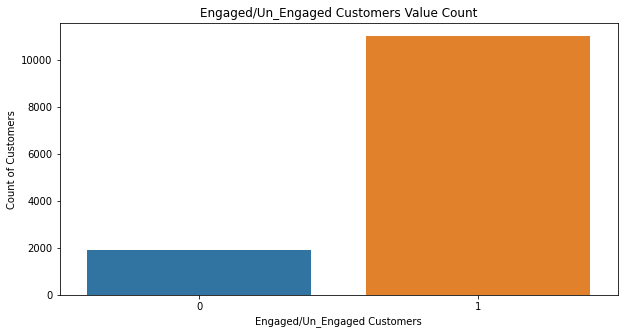

In [ ]:
# Target Distribution of Engaged /Un_Engaged Customers for observed data from Jan to Sep 2018
plt.figure(figsize=(10,5))
count_plot = sns.countplot(x= 'Target', data =aggregated_observations_sep2018_df)
count_plot.set(title = "Engaged/Un_Engaged Customers Value Count",
               xlabel = "Engaged/Un_Engaged Customers",
               ylabel = "Count of Customers"
               )
plt.show(count_plot)

**As per the Above Distribution, The value in Un - Balanced**

[Text(0, 0.5, 'Count of Customers'),
 Text(0.5, 0, 'Engaged/Un_Engaged Customers'),
 Text(0.5, 1.0, 'Engaged/Un_Engaged Customers Value Count')]

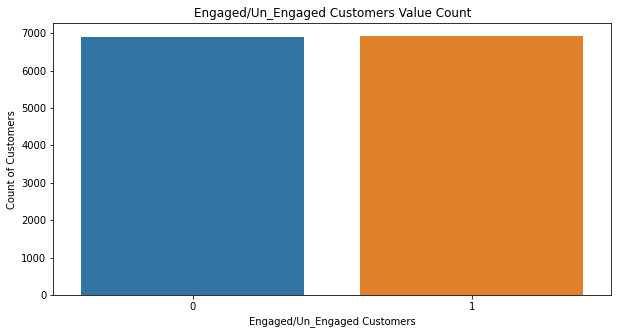

In [ ]:

# Target Distribution of Engaged / Un_Engaged Customers for observed data from dec 2018

plt.figure(figsize=(10,5))
count_plot = sns.countplot(x= 'Target', data =aggregated_observations_dec2018_df )
count_plot.set(title = "Engaged/Un_Engaged Customers Value Count",
               xlabel = "Engaged/Un_Engaged Customers",
               ylabel = "Count of Customers"
               )

[Text(0, 0.5, 'Count of Customers'),
 Text(0.5, 0, 'Engaged/Un_Engaged Customers'),
 Text(0.5, 1.0, 'Engaged/Un_Engaged Customers Value Count')]

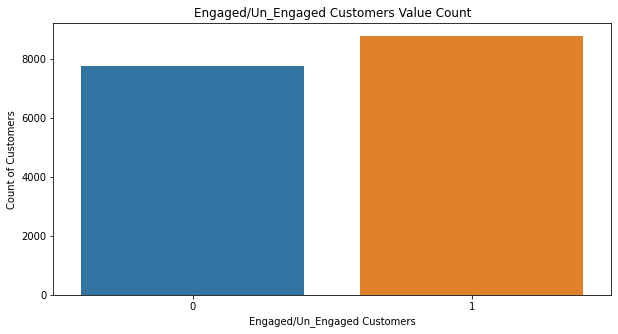

In [ ]:
# Target Distribution of Engaged /Un_Engaged Customers for observed data from oct to dec 2018

plt.figure(figsize=(10,5))
count_plot = sns.countplot(x= 'Target', data =aggregated_observations_oct_dec_2018_df )
count_plot.set(title = "Engaged/Un_Engaged Customers Value Count",
               xlabel = "Engaged/Un_Engaged Customers",
               ylabel = "Count of Customers"
               )

# ***Feature Engineering***

In [ ]:
aggregated_observations_sep2018_df.head()

user_id  yearmonth  attributes_notifications_marketing_email  \
0     c_0          9                                       9.0   
1     c_1          8                                       0.0   
2    c_10          9                                       9.0   
3   c_100          8                                       0.0   
4  c_1000          6                                       6.0   

   attributes_notifications_marketing_push  num_contacts  num_referrals  \
0                                      9.0             3              0   
1                                      0.0            21              0   
2                                      9.0            38              0   
3                                      0.0             0              0   
4                                      6.0             0              0   

   brand_android  brand_unknown  brand_apple  plan_type_1  plan_type_2  \
0              0              0            1            0            0   
1              0              0            1            0            0   
2              0              0            1            0            0   
3              0              0            1            0            0   
4              1              0            0            0            0   

   plan_type_3  plan_type_4  plan_type_5  plan_type_6  user_settings_type  \
0            0            0            0            1                   1   
1            0            0            0            1                   0   
2            0            0            0            1                   0   
3            0            0            0            1                   0   
4            0            0            0            1                   1   

   channel_push  channel_sms  channel_email  reason_reengagement_active_funds  \
0             0            0              0                                 0   
1             0            0              3                                 0   
2             0            0              0                                 0   
3             0            0              0                                 0   
4             2            0              3                                 2   

   reason_pumpkin_payment_notification  reason_no_initial_card_use  \
0                                    0                           0   
1                                    0                           2   
2                                    0                           0   
3                                    0                           0   
4                                    0                           0   

   reason_engagement_split_bill_restaurant  reason_metal_reserve_plan  \
0                                        0                          0   
1                                        0                          0   
2                                        0                          0   
3                                        0                          0   
4                                        0                          0   

   reason_onboarding_tips_activated_users  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   reason_made_money_request_not_split_bill  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   reason_premium_engagement_inactive_card  reason_no_initial_card_order  \
0                                        0                             0   
1                                        0                             1   
2                                        0                             0   
3                                        

In [ ]:
aggregated_observations_sep2018_df.shape

(12950, 105)

## Handling Multi-Collinearity between Independent Variables


> It is important to identify and handle multi-collinearity in the data before training a machine learning model, in order to ensure that the model is stable, interpretable, and accurate





> Visualising using a heatmap if it detects any correlation between the columns



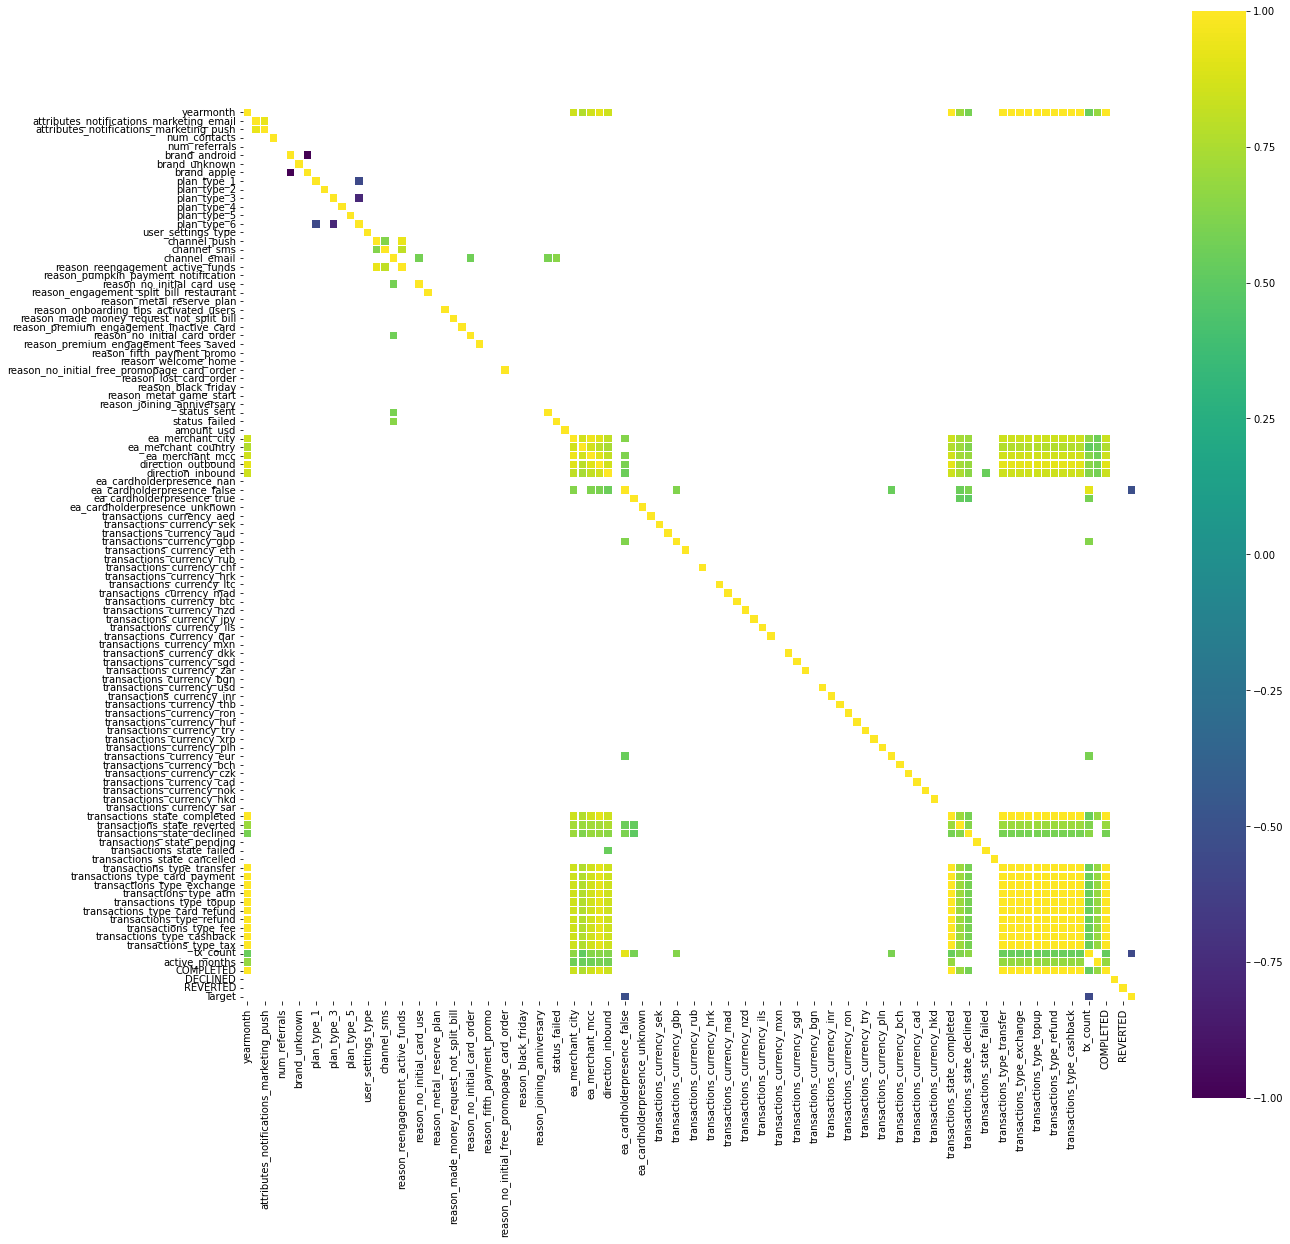

In [ ]:
# Visualization to check correlation using heatmap
corr = aggregated_observations_sep2018_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)],
            cmap = 'viridis', vmax = 1.0, vmin=-1.0, linewidths = 0.1,
            annot = False,  annot_kws={'size' : 8}, square = True)

Using the heatmap to identify columns that have a high correlation with each other. If two columns have a strong correlation (either positive or negative), Considering dropping one of them in order to reduce multicollinearity in your data

In [ ]:
aggregated_observations_sep2018_df.drop(['brand_unknown','ea_cardholderpresence_false'], axis =1 , inplace =True)

In [ ]:
aggregated_observations_sep2018_df.drop(['user_id'], axis=1, inplace =True)

In [ ]:
# Checking for numerical and catagorical columns

numerical_columns = []
categorical_columns = []

# Checking for columns whose varainace is 1
columns_to_remove = []

for column in aggregated_observations_sep2018_df.columns:
  if len(aggregated_observations_sep2018_df[column].unique()) == 2 :
    categorical_columns.append(column)

  elif len(aggregated_observations_sep2018_df[column].unique()) == 1 :  # in this columns there is only one variance which is not usable further 
      columns_to_remove.append(column)

  else:
    numerical_columns.append(column)

In [ ]:
numerical_columns

['yearmonth',
 'attributes_notifications_marketing_email',
 'attributes_notifications_marketing_push',
 'num_contacts',
 'channel_push',
 'channel_sms',
 'channel_email',
 'reason_reengagement_active_funds',
 'reason_no_initial_card_use',
 'reason_onboarding_tips_activated_users',
 'reason_made_money_request_not_split_bill',
 'reason_premium_engagement_inactive_card',
 'reason_no_initial_card_order',
 'reason_premium_engagement_fees_saved',
 'reason_no_initial_free_promopage_card_order',
 'status_sent',
 'status_failed',
 'amount_usd',
 'ea_merchant_city',
 'ea_merchant_country',
 'ea_merchant_mcc',
 'direction_outbound',
 'direction_inbound',
 'ea_cardholderpresence_true',
 'ea_cardholderpresence_unknown',
 'transactions_currency_aed',
 'transactions_currency_sek',
 'transactions_currency_aud',
 'transactions_currency_gbp',
 'transactions_currency_eth',
 'transactions_currency_chf',
 'transactions_currency_ltc',
 'transactions_currency_mad',
 'transactions_currency_btc',
 'transaction

In [ ]:
categorical_columns

['brand_android',
 'brand_apple',
 'plan_type_1',
 'plan_type_2',
 'plan_type_3',
 'plan_type_4',
 'plan_type_5',
 'plan_type_6',
 'user_settings_type',
 'reason_engagement_split_bill_restaurant',
 'Target']

In [ ]:
columns_to_remove

['num_referrals',
 'reason_pumpkin_payment_notification',
 'reason_metal_reserve_plan',
 'reason_fifth_payment_promo',
 'reason_welcome_home',
 'reason_lost_card_order',
 'reason_black_friday',
 'reason_metal_game_start',
 'reason_joining_anniversary',
 'ea_cardholderpresence_nan',
 'transactions_currency_rub',
 'transactions_currency_hrk',
 'transactions_currency_mxn',
 'transactions_currency_bgn',
 'transactions_currency_sar']

In [ ]:
#Removing the columns which are not necessary  
aggregated_observations_sep2018_df.drop(columns_to_remove,axis=1, inplace= True)

In [ ]:
aggregated_observations_sep2018_df.shape

(12950, 87)

## Feature Selection

The purpose of the Below code is to create separate variables for the feature data (stored in X) and the target data (stored in y)

In [ ]:
X = aggregated_observations_sep2018_df.drop(['Target'],axis=1)
y = aggregated_observations_sep2018_df['Target']

## Scaling the data



In [ ]:
# Scaling the data using a scaler such as StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#Scaling numerical columns
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
X.head()

yearmonth  attributes_notifications_marketing_email  \
0   2.642227                                  3.170313   
1   2.168860                                 -0.876873   
2   2.642227                                  3.170313   
3   2.168860                                 -0.876873   
4   1.222127                                  1.821251   

   attributes_notifications_marketing_push  num_contacts  brand_android  \
0                                 3.091070     -0.300236              0   
1                                -0.923105      0.115322              0   
2                                 3.091070      0.507794              0   
3                                -0.923105     -0.369496              0   
4                                 1.753012     -0.369496              1   

   brand_apple  plan_type_1  plan_type_2  plan_type_3  plan_type_4  \
0            1            0            0            0            0   
1            1            0            0            0            0   
2            1            0            0            0            0   
3            1            0            0            0            0   
4            0            0            0            0            0   

   plan_type_5  plan_type_6  user_settings_type  channel_push  channel_sms  \
0            0            1                   1     -0.528659    -0.377683   
1            0            1                   0     -0.528659    -0.377683   
2            0            1                   0     -0.528659    -0.377683   
3            0            1                   0     -0.528659    -0.377683   
4            0            1                   1      1.199071    -0.377683   

   channel_email  reason_reengagement_active_funds  \
0      -0.710092                         -0.500769   
1       0.788554                         -0.500769   
2      -0.710092                         -0.500769   
3      -0.710092                         -0.500769   
4       0.788554                          0.916399   

   reason_no_initial_card_use  reason_engagement_split_bill_restaurant  \
0                   -0.302664                                        0   
1                    1.223025                                        0   
2                   -0.302664                                        0   
3                   -0.302664                                        0   
4                   -0.302664                                        0   

   reason_onboarding_tips_activated_users  \
0                               -0.181301   
1                               -0.181301   
2                               -0.181301   
3                               -0.181301   
4                               -0.181301   

   reason_made_money_request_not_split_bill  \
0                                  -0.08003   
1                                  -0.08003   
2                                  -0.08003   
3                                  -0.08003   
4                                  -0.08003   

   reason_premium_engagement_inactive_card  reason_no_initial_card_order  \
0                                -0.178913                     -0.547316   
1                                -0.178913                      0.284579   
2                                -0.178913                     -0.547316   
3                                -0.178913                     -0.547316   
4                                -0.178913                      1.948368   

   reason_premium_engagement_fees_saved  \
0                             -0.084542   
1                             -0.084542   
2                             -0.084542   
3                             -0.084542   
4                             -0.084542   

   reason_no_initial_free_promopage_card_order  status_sent  status_failed  \
0                                    -0.285055    -0.982626      -0.465841   
1                                    -0.285055    -0.275131       0.697526   
2                                    -0

## Dimensionality Reduction using PCA

The below code performs principal component analysis (PCA) on the input data X. PCA is a technique for dimensionality reduction that aims to represent the maximum amount of variance in the data with a smaller number of principal components.

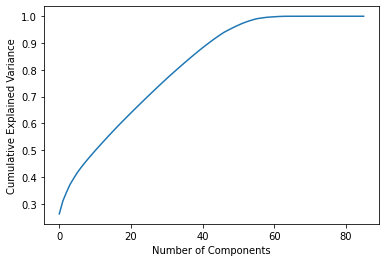

In [ ]:
from sklearn.decomposition import PCA

# Assuming your data is stored in a NumPy array called `X`
pca = PCA()
pca.fit(X)

# The explained variance can be accessed via the `explained_variance_` attribute
explained_variance = pca.explained_variance_

# visualizing the explained variance by plotting the cumulative sum of the explained variance
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

plt.show()

In [ ]:
pca = PCA(n_components=60)
X_pca = pca.fit_transform(X)

In [ ]:
X_pca.shape

(12950, 60)

In [ ]:
y.shape

(12950,)

# Logistic Regression Classification Model

In [ ]:
# !pip install --upgrade yellowbrick
# !pip install plot_metric
# !pip install scikit-plot

## Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score , RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, classification_report, roc_curve


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import KFold

In [ ]:
X.head()

yearmonth  attributes_notifications_marketing_email  \
0   2.642227                                  3.170313   
1   2.168860                                 -0.876873   
2   2.642227                                  3.170313   
3   2.168860                                 -0.876873   
4   1.222127                                  1.821251   

   attributes_notifications_marketing_push  num_contacts  brand_android  \
0                                 3.091070     -0.300236              0   
1                                -0.923105      0.115322              0   
2                                 3.091070      0.507794              0   
3                                -0.923105     -0.369496              0   
4                                 1.753012     -0.369496              1   

   brand_apple  plan_type_1  plan_type_2  plan_type_3  plan_type_4  \
0            1            0            0            0            0   
1            1            0            0            0            0   
2            1            0            0            0            0   
3            1            0            0            0            0   
4            0            0            0            0            0   

   plan_type_5  plan_type_6  user_settings_type  channel_push  channel_sms  \
0            0            1                   1     -0.528659    -0.377683   
1            0            1                   0     -0.528659    -0.377683   
2            0            1                   0     -0.528659    -0.377683   
3            0            1                   0     -0.528659    -0.377683   
4            0            1                   1      1.199071    -0.377683   

   channel_email  reason_reengagement_active_funds  \
0      -0.710092                         -0.500769   
1       0.788554                         -0.500769   
2      -0.710092                         -0.500769   
3      -0.710092                         -0.500769   
4       0.788554                          0.916399   

   reason_no_initial_card_use  reason_engagement_split_bill_restaurant  \
0                   -0.302664                                        0   
1                    1.223025                                        0   
2                   -0.302664                                        0   
3                   -0.302664                                        0   
4                   -0.302664                                        0   

   reason_onboarding_tips_activated_users  \
0                               -0.181301   
1                               -0.181301   
2                               -0.181301   
3                               -0.181301   
4                               -0.181301   

   reason_made_money_request_not_split_bill  \
0                                  -0.08003   
1                                  -0.08003   
2                                  -0.08003   
3                                  -0.08003   
4                                  -0.08003   

   reason_premium_engagement_inactive_card  reason_no_initial_card_order  \
0                                -0.178913                     -0.547316   
1                                -0.178913                      0.284579   
2                                -0.178913                     -0.547316   
3                                -0.178913                     -0.547316   
4                                -0.178913                      1.948368   

   reason_premium_engagement_fees_saved  \
0                             -0.084542   
1                             -0.084542   
2                             -0.084542   
3                             -0.084542   
4                             -0.084542   

   reason_no_initial_free_promopage_card_order  status_sent  status_failed  \
0                                    -0.285055    -0.982626      -0.465841   
1                                    -0.285055    -0.275131       0.697526   
2                                    -0

In [ ]:
y.value_counts()

1    11029
0     1921
Name: Target, dtype: int64

## Splitting the dataset into training and test sets

This is typically done using the train_test_split function from the sklearn.model_selection module.

> splitting the data in such a way that:


1. Training data: 80% until September 2018

2. Validation data 1: 20% until September 2018 (out-of-sample).

3. Validation data 2 (out-of-date): December 2018  and Scoring data: January 2019 



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=100, stratify=y)

## Training a Model

> Train a model using the training data



In [ ]:
# Training the model using LogisticRegression
from sklearn.linear_model import LogisticRegression 


logisticRegression_model = LogisticRegression(max_iter=1000,solver='sag')

logisticRegression_model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, solver='sag')

## Tuning the Model

> Tuning the model's hyperparameters using cross-validation and grid search



In [ ]:
# Tuning the model's hyperparameters using cross-validation and grid search
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

params = {'C':np.linspace(start=0.01,stop=1,num=10),
          'class_weight':[{1:0.13,0:0.87},{1:0.87,0:0.13},{1:0.15,0:0.85},{1:0.85,0:0.15},{1:0.25,0:0.75},{1:0.75,0:0.25},'balanced'] # To handle "Imbalanced Classes"
          }

In [ ]:
randomSearchOptimizer = RandomizedSearchCV(estimator = LogisticRegression(),
                                 param_distributions=params,
                                 scoring='roc_auc',
                                 cv=5,
                                 verbose=4,
                                 n_jobs=-1)

randomSearchOptimizer.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
                                        'class_weight': [{0: 0.87, 1: 0.13},
                                                         {0: 0.13, 1: 0.87},
                                                         {0: 0.85, 1: 0.15},
                                                         {0: 0.15, 1: 0.85},
                                                         {0: 0.75, 1: 0.25},
                                                         {0: 0.25, 1: 0.75},
                                                         'balanced']},
                   scoring='roc_auc', verbose=4)

In [ ]:
logistic_best_model = randomSearchOptimizer.best_estimator_

## Evaluating the model


> Evaluating the model's performance on the test set:

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score

logistic_y_pred = logistic_best_model.predict(X_test)
accuracy = accuracy_score(y_test, logistic_y_pred)
roc_auc = roc_auc_score(y_test, logistic_y_pred)
print(f'Test accuracy: {accuracy:.2f}')
print(f'Roc Auc accuracy: {roc_auc:.2f}')



Test accuracy: 0.85
Roc Auc accuracy: 0.84


## Validating the Model's Performance using Train Data



> Validating the model's performance using k-fold cross-validation:



In [ ]:
from sklearn.model_selection import cross_val_score

logistic_scores = cross_val_score(logistic_best_model, X_train, y_train,scoring = 'roc_auc', cv=5)
print(f'Cross-validation scores: {logistic_scores}')
print(f'Mean cross-validation score: {np.mean(logistic_scores):.2f}')
print(f'Standard deviation of cross-validation scores: {np.std(logistic_scores):.2f}')


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross-validation scores: [0.90960866 0.89488332 0.91297672 0.90998542 0.89727449]
Mean cross-validation score: 0.90
Standard deviation of cross-validation scores: 0.01


## Validating the Model's Performance using Test Data

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logistic_best_model, X_test, y_test,scoring = 'roc_auc', cv=5)
print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation score: {np.mean(scores):.2f}')
print(f'Standard deviation of cross-validation scores: {np.std(scores):.2f}')


Cross-validation scores: [0.89750536 0.94336956 0.85658333 0.89053803 0.87543069]
Mean cross-validation score: 0.89
Standard deviation of cross-validation scores: 0.03


## Model Evaluation using Confusion Matrix

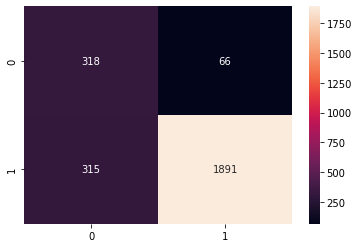

In [ ]:
from sklearn.metrics import confusion_matrix,roc_auc_score, classification_report
# Get the confusion matrix
confusionMatrix = confusion_matrix(y_test, logistic_y_pred)

# Visualize the confusion matrix using Seaborn's heatmap function
sns.heatmap(confusionMatrix, annot=True, fmt="d")

In [ ]:
pd.DataFrame(classification_report(y_test,logistic_y_pred,output_dict=True)).transpose()


precision    recall  f1-score      support
0              0.502370  0.828125  0.625369   384.000000
1              0.966275  0.857208  0.908479  2206.000000
accuracy       0.852896  0.852896  0.852896     0.852896
macro avg      0.734322  0.842666  0.766924  2590.000000
weighted avg   0.897495  0.852896  0.866505  2590.000000



---



# **Decision Tree Classifier**

## Training Decision Tree Model


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

decisiontree_model = DecisionTreeClassifier(criterion = "gini", random_state =5,max_depth=4)
decisiontree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=5)

## Tuning a model

In [ ]:
# Set up the parameters for the grid search
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'class_weight': [{1:0.13,0:0.87},{1:0.87,0:0.13},{1:0.15,0:0.85},{1:0.85,0:0.15},{1:0.25,0:0.75},{1:0.75,0:0.25},'balanced']}


In [ ]:
# Set up the grid search using 5-fold cross-validation
grid_search = GridSearchCV(decisiontree_model, parameters, 
                           scoring='roc_auc',
                                 cv=5,
                                 verbose=4,
                                 n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=5),
             n_jobs=-1,
             param_grid={'class_weight': [{0: 0.87, 1: 0.13},
                                          {0: 0.13, 1: 0.87},
                                          {0: 0.85, 1: 0.15},
                                          {0: 0.15, 1: 0.85},
                                          {0: 0.75, 1: 0.25},
                                          {0: 0.25, 1: 0.75}, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc', verbose=4)

In [ ]:
# Get the best estimator from the grid search
best_decisiontree_model = grid_search.best_estimator_

## Evaluating the model


> Evaluating the model's performance on the test set




In [ ]:
from sklearn.metrics import accuracy_score

tree_y_pred = best_decisiontree_model.predict(X_test)
accuracy = accuracy_score(y_test, tree_y_pred)
print(f'Test accuracy: {accuracy:.2f}')


Test accuracy: 0.88


## Validating the Model's Performance using Train Data


> Validating the model's performance using k-fold cross-validation:



In [ ]:
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(best_decisiontree_model, X_train, y_train,scoring = 'roc_auc', cv=5)
print(f'Cross-validation scores: {tree_scores}')
print(f'Mean cross-validation score: {np.mean(tree_scores):.2f}')
print(f'Standard deviation of cross-validation scores: {np.std(tree_scores):.2f}')


Cross-validation scores: [0.86902031 0.85776176 0.86156352 0.86340353 0.86909731]
Mean cross-validation score: 0.86
Standard deviation of cross-validation scores: 0.00


## Validating the Model's Performance using Test Data

In [ ]:
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(best_decisiontree_model, X_test, y_test,scoring = 'roc_auc', cv=5)
print(f'Cross-validation scores: {tree_scores}')
print(f'Mean cross-validation score: {np.mean(tree_scores):.2f}')
print(f'Standard deviation of cross-validation scores: {np.std(tree_scores):.2f}')


Cross-validation scores: [0.82120743 0.86145714 0.79312071 0.84103425 0.84782225]
Mean cross-validation score: 0.83
Standard deviation of cross-validation scores: 0.02


In [ ]:
pd.DataFrame(classification_report(y_test,tree_y_pred,output_dict=True)).transpose()

precision    recall  f1-score      support
0              0.845361  0.213542  0.340956   384.000000
1              0.878861  0.993200  0.932539  2206.000000
accuracy       0.877606  0.877606  0.877606     0.877606
macro avg      0.862111  0.603371  0.636748  2590.000000
weighted avg   0.873894  0.877606  0.844829  2590.000000

## Plotting Decision Tree Graph

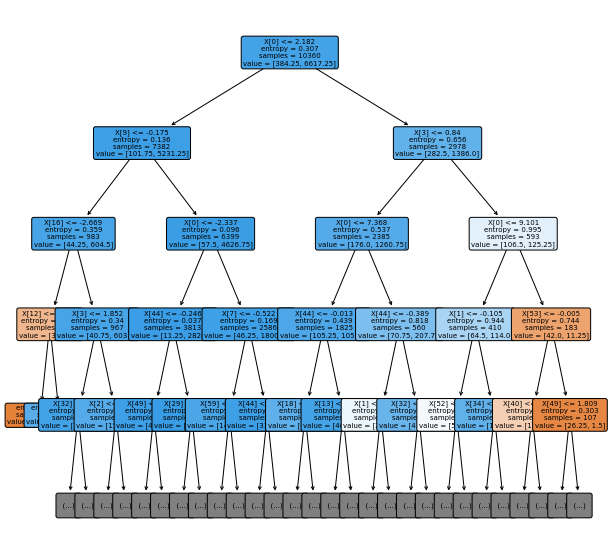

In [ ]:
from sklearn import tree

fig, axe = plt.subplots(figsize=(10,10))#dpi=200
        
tree.plot_tree(best_decisiontree_model, ax = axe, filled=True, rounded=True, fontsize=7, max_depth=4)
        
plt.show()



---



# *K Neighbors Classifier*

## Training a Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

## Hyperparameter Tuning

In [ ]:
params = {'n_neighbors': [3, 5, 7, 9, 11, 13],
          'weights': ['uniform', 'distance'],
          'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
          'leaf_size': [30, 50, 70]}

knn_optimizer = GridSearchCV(knn_model, params, scoring='roc_auc',
                                 cv=5,
                                 verbose=4,
                                 n_jobs=-1)
knn_optimizer.fit(X_train, y_train)

knn_best_model = knn_optimizer.best_estimator_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


## Evaluating the Model

In [ ]:
knn_y_pred = knn_best_model.predict(X_test)
accuracy = accuracy_score(y_test, knn_y_pred)
print(f'Test accuracy: {accuracy:.2f}')

Test accuracy: 0.88


## Cross-Validating the Model's performance using Train data

In [ ]:
knn_scores = cross_val_score(knn_best_model, X_train, y_train,scoring = 'roc_auc', cv=5)
print(f'Cross-validation scores: {knn_scores}')
print(f'Mean cross-validation score: {np.mean(knn_scores):.2f}')
print(f'Standard deviation of cross-validation scores: {np.std(knn_scores):.2f}')


Cross-validation scores: [0.85459486 0.83626524 0.85967464 0.86182157 0.85390347]
Mean cross-validation score: 0.85
Standard deviation of cross-validation scores: 0.01


## Cross-Validating the Model's performance using Train data

In [ ]:
knn_scores = cross_val_score(knn_best_model, X_test, y_test,scoring = 'roc_auc', cv=5)
print(f'Cross-validation scores: {knn_scores}')
print(f'Mean cross-validation score: {np.mean(knn_scores):.2f}')
print(f'Standard deviation of cross-validation scores: {np.std(knn_scores):.2f}')


Cross-validation scores: [0.83802691 0.86089761 0.82695762 0.82577966 0.8572312 ]
Mean cross-validation score: 0.84
Standard deviation of cross-validation scores: 0.01


## Model Evaluation using Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix,roc_auc_score
# Calculate the confusion matrix
cm = confusion_matrix(y_test, knn_y_pred)

print(cm)

[[ 117  267]
 [  45 2161]]


In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate the predicted probabilities for the positive class for the test set
y_pred_proba = knn_best_model.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'ROC AUC Score: {roc_auc:.2f}')


ROC AUC Score: 0.86


In [ ]:
pd.DataFrame(classification_report(y_test,knn_y_pred,output_dict=True)).transpose()

precision    recall  f1-score      support
0              0.722222  0.304688  0.428571   384.000000
1              0.890033  0.979601  0.932672  2206.000000
accuracy       0.879537  0.879537  0.879537     0.879537
macro avg      0.806128  0.642144  0.680621  2590.000000
weighted avg   0.865153  0.879537  0.857932  2590.000000

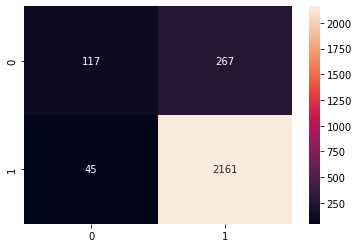

In [ ]:
# Visualize the confusion matrix using Seaborn's heatmap function
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d")

# Comparing all the Three Models Predictions using ROC_AUC

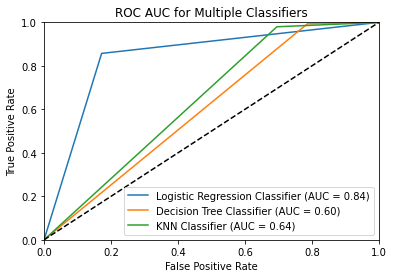

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the false positive rate and true positive rate for each classifier
fpr1, tpr1, _ = roc_curve(y_test, logistic_y_pred)
fpr2, tpr2, _ = roc_curve(y_test, tree_y_pred)
fpr3, tpr3, _ = roc_curve(y_test, knn_y_pred)

# Calculate the area under the curve for each classifier
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)

# Plot the ROC AUC curve for each classifier
plt.plot(fpr1, tpr1, label='Logistic Regression Classifier (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Decision Tree Classifier (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='KNN Classifier (AUC = %0.2f)' % roc_auc3)

# Add labels and formatting
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC for Multiple Classifiers')
plt.legend(loc="lower right")
plt.show()


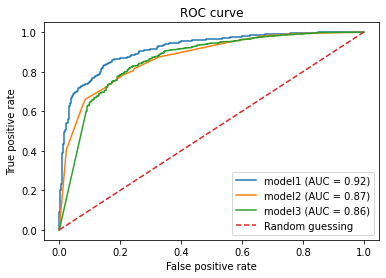

In [ ]:
from sklearn.metrics import roc_curve, auc

# Predict the probabilities of the positive class for each model
model1_probs = logistic_best_model.predict_proba(X_test)[:, 1]
model2_probs = best_decisiontree_model.predict_proba(X_test)[:, 1]
model3_probs = knn_best_model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate and true positive rate for each model
fpr1, tpr1, thresholds1 = roc_curve(y_test, model1_probs)
fpr2, tpr2, thresholds2 = roc_curve(y_test, model2_probs)
fpr3, tpr3, thresholds3 = roc_curve(y_test, model3_probs)

# Calculate the area under the curve (AUC) for each model
auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2, tpr2)
auc3 = auc(fpr3, tpr3)

# Plot the ROC curve for each model on the same plot
plt.plot(fpr1, tpr1, label=f'model1 (AUC = {auc1:.2f})')
plt.plot(fpr2, tpr2, label=f'model2 (AUC = {auc2:.2f})')
plt.plot(fpr3, tpr3, label=f'model3 (AUC = {auc3:.2f})')

# Add a label for the random guessing line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guessing')

# Add labels and formatting to the plot
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()


# **Random Forest Classifier**

## Training the Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier
randomforestclf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training set
randomforestclf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Hyperparameter Tuning

In [ ]:
# Define the hyperparameter grid
param_grid = {
    
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [5, 10, 15, 20, 25],
    "min_samples_split": [2, 4, 6, 8, 10],
    "min_samples_leaf": [1, 2, 4, 6, 8]
}

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
# Create the grid search object
grid_search = RandomizedSearchCV(estimator=randomforestclf_model, param_distributions=param_grid, cv=5, n_jobs=-1)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

randomforest_best_model = grid_search.best_estimator_
print("Best estimator:", grid_search.best_estimator_)


Best parameters: {'n_estimators': 200, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_depth': 10}
Best score: 0.8897683397683398
Best estimator: RandomForestClassifier(max_depth=10, min_samples_leaf=6, min_samples_split=8,
                       n_estimators=200, random_state=42)


## Evaluating the Model

In [ ]:
from sklearn.metrics import accuracy_score

random_y_pred = randomforest_best_model.predict(X_test)
accuracy = accuracy_score(y_test, random_y_pred)
print(f'Test accuracy: {accuracy:.2f}')


Test accuracy: 0.90


## Cross-Validating the Model's performance with Train Data

In [ ]:
from sklearn.model_selection import cross_val_score

random_scores = cross_val_score(randomforest_best_model, X_train, y_train,scoring = 'roc_auc', cv=5)
print(f'Cross-validation scores: {random_scores}')
print(f'Mean cross-validation score: {np.mean(random_scores):.2f}')
print(f'Standard deviation of cross-validation scores: {np.std(random_scores):.2f}')


Cross-validation scores: [0.89087671 0.8808685  0.90462485 0.90129981 0.89332281]
Mean cross-validation score: 0.89
Standard deviation of cross-validation scores: 0.01


## Cross-Validating the Model's performance with Test Data

In [ ]:
from sklearn.model_selection import cross_val_score

random_scores = cross_val_score(randomforest_best_model, X_test, y_test,scoring = 'roc_auc', cv=5)
print(f'Cross-validation scores: {random_scores}')
print(f'Mean cross-validation score: {np.mean(random_scores):.2f}')
print(f'Standard deviation of cross-validation scores: {np.std(random_scores):.2f}')


Cross-validation scores: [0.875387   0.92039933 0.86853962 0.88061372 0.90222929]
Mean cross-validation score: 0.89
Standard deviation of cross-validation scores: 0.02


## Plotting Random Forest Classifier

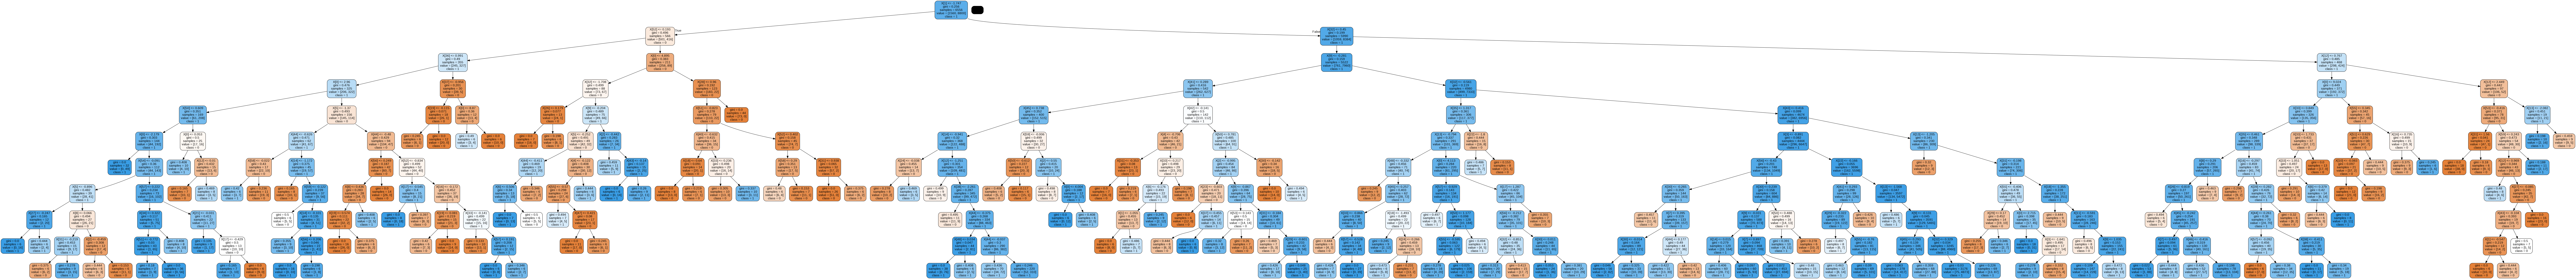

In [ ]:
from sklearn.tree import export_graphviz
import six
from six import StringIO  
from IPython.display import Image  
import pydotplus

# Export the first decision tree to a dot file
dot_data = StringIO()
export_graphviz(randomforest_best_model.estimators_[0], out_file=dot_data,  
                filled=True, rounded=True,
                class_names=['0', '1'])

# Plot the decision tree as a graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


# Comparing All the Four Models with "Accuracy", "ROC-AUC Score", "Precision", "Recall", "F1-score"

In [ ]:
import plotly.graph_objects as go
from sklearn.metrics import f1_score,accuracy_score, roc_auc_score, precision_score,recall_score
# Create a multi-line plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    name="Logistic Regression",
    x=["Accuracy", "ROC-AUC Score", "Precision", "Recall", "F1-score"],
    y=[accuracy_score(y_test,logistic_best_model.predict(X_test)), 
       roc_auc_score(y_test,logistic_best_model.predict(X_test)),
       precision_score(y_test,logistic_best_model.predict(X_test)),
       recall_score(y_test,logistic_best_model.predict(X_test)),
       f1_score(y_test,logistic_best_model.predict(X_test))]
))

fig.add_trace(go.Scatter(
    name="Decision Tree",
    x=["Accuracy", "ROC-AUC Score", "Precision", "Recall", "F1-score"],
    y=[accuracy_score(y_test,best_decisiontree_model.predict(X_test)), 
       roc_auc_score(y_test,best_decisiontree_model.predict(X_test)),
       precision_score(y_test,best_decisiontree_model.predict(X_test)),
       recall_score(y_test,best_decisiontree_model.predict(X_test)),
       f1_score(y_test,best_decisiontree_model.predict(X_test))]
       ))

fig.add_trace(go.Scatter(
    name="K Neighbors",
    x=["Accuracy","ROC-AUC Score","Precision","Recall","F1-score"],
    y=[accuracy_score(y_test,knn_best_model.predict(X_test)),
       roc_auc_score(y_test,knn_best_model.predict(X_test)),
       precision_score(y_test,knn_best_model.predict(X_test)),
       recall_score(y_test,knn_best_model.predict(X_test)),
       f1_score(y_test,knn_best_model.predict(X_test))]
       ))

fig.update_layout(
    title="Classification Models' KPI comparison  on Training Dataset"
    )

fig.show()



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics for each model
logistic_accuracy = accuracy_score(y_test, logistic_best_model.predict(X_test))
logistic_precision = precision_score(y_test, logistic_best_model.predict(X_test))
logistic_recall = recall_score(y_test, logistic_best_model.predict(X_test))
logistic_f1 = f1_score(y_test, logistic_best_model.predict(X_test))

decision_accuracy = accuracy_score(y_test, best_decisiontree_model.predict(X_test))
decision_precision = precision_score(y_test, best_decisiontree_model.predict(X_test))
decision_recall = recall_score(y_test, best_decisiontree_model.predict(X_test))
decision_f1 = f1_score(y_test, best_decisiontree_model.predict(X_test))

knn_accuracy = accuracy_score(y_test, knn_best_model.predict(X_test))
knn_precision = precision_score(y_test, knn_best_model.predict(X_test))
knn_recall = recall_score(y_test, knn_best_model.predict(X_test))
knn_f1 = f1_score(y_test, knn_best_model.predict(X_test))

# Compare evaluation metrics
print("Logistic Regression:")
print("Accuracy: ", logistic_accuracy)
print("Precision: ", logistic_precision)
print("Recall: ", logistic_recall)
print("F1 Score: ", logistic_f1)

print("\nDecision Tree:")
print("Accuracy: ", decision_accuracy)
print("Precision: ", decision_precision)
print("Recall: ", decision_recall)
print("F1 Score: ", decision_f1)

print("\nK-Nearest Neighbors:")
print("Accuracy: ", knn_accuracy)
print("Precision: ", knn_precision)
print("Recall: ", knn_recall)
print("F1 Score: ", knn_f1)

# Choose the model with the highest F1 score
if logistic_f1 > decision_f1 &  logistic_f1 > knn_f1:
    print("Logistic Regression Classifier is the Best Model: ", logistic_best_model)
elif decision_f1 > logistic_f1 & decision_f1 > knn_f1:
    print("Decision Tree Classifier is the Best Model: ",best_decisiontree_model)
else:
    print("K Neighbors Classifier is the Best Model: ",knn_best_model)


In [ ]:
import plotly.graph_objects as go
from sklearn.metrics import f1_score,accuracy_score, roc_auc_score, precision_score,recall_score
# Create a multi-line plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    name="Logistic Regression",
    x=["Accuracy", "ROC-AUC Score", "Precision", "Recall", "F1-score"],
    y=[accuracy_score(y_test,logistic_best_model.predict(X_test)), 
       roc_auc_score(y_test,logistic_best_model.predict(X_test)),
       precision_score(y_test,logistic_best_model.predict(X_test)),
       recall_score(y_test,logistic_best_model.predict(X_test)),
       f1_score(y_test,logistic_best_model.predict(X_test))]
))

fig.add_trace(go.Scatter(
    name="Decision Tree",
    x=["Accuracy", "ROC-AUC Score", "Precision", "Recall", "F1-score"],
    y=[accuracy_score(y_test,best_decisiontree_model.predict(X_test)), 
       roc_auc_score(y_test,best_decisiontree_model.predict(X_test)),
       precision_score(y_test,best_decisiontree_model.predict(X_test)),
       recall_score(y_test,best_decisiontree_model.predict(X_test)),
       f1_score(y_test,best_decisiontree_model.predict(X_test))]
       ))

fig.add_trace(go.Scatter(
    name="K Neighbors",
    x=["Accuracy","ROC-AUC Score","Precision","Recall","F1-score"],
    y=[accuracy_score(y_test,knn_best_model.predict(X_test)),
       roc_auc_score(y_test,knn_best_model.predict(X_test)),
       precision_score(y_test,knn_best_model.predict(X_test)),
       recall_score(y_test,knn_best_model.predict(X_test)),
       f1_score(y_test,knn_best_model.predict(X_test))]
       ))

fig.add_trace(go.Scatter(
    name="Random Forest",
    x=["Accuracy","ROC-AUC Score","Precision","Recall","F1-score"],
    y=[accuracy_score(y_test,randomforest_best_model.predict(X_test)),
       roc_auc_score(y_test,randomforest_best_model.predict(X_test)),
       precision_score(y_test,randomforest_best_model.predict(X_test)),
       recall_score(y_test,randomforest_best_model.predict(X_test)),
       f1_score(y_test,randomforest_best_model.predict(X_test))]
       ))

fig.update_layout(
    title="Classification Models' KPI comparison  on Training Dataset"
    )

fig.show()



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics for each model
logistic_accuracy = accuracy_score(y_test, logistic_best_model.predict(X_test))
logistic_precision = precision_score(y_test, logistic_best_model.predict(X_test))
logistic_recall = recall_score(y_test, logistic_best_model.predict(X_test))
logistic_f1 = f1_score(y_test, logistic_best_model.predict(X_test))

decision_accuracy = accuracy_score(y_test, best_decisiontree_model.predict(X_test))
decision_precision = precision_score(y_test, best_decisiontree_model.predict(X_test))
decision_recall = recall_score(y_test, best_decisiontree_model.predict(X_test))
decision_f1 = f1_score(y_test, best_decisiontree_model.predict(X_test))

knn_accuracy = accuracy_score(y_test, knn_best_model.predict(X_test))
knn_precision = precision_score(y_test, knn_best_model.predict(X_test))
knn_recall = recall_score(y_test, knn_best_model.predict(X_test))
knn_f1 = f1_score(y_test, knn_best_model.predict(X_test))

random_accuracy = accuracy_score(y_test, randomforest_best_model.predict(X_test))
random_precision = precision_score(y_test, randomforest_best_model.predict(X_test))
random_recall = recall_score(y_test, randomforest_best_model.predict(X_test))
random_f1 = f1_score(y_test, randomforest_best_model.predict(X_test))


# Compare evaluation metrics
print("Logistic Regression Classifier:")
print("Accuracy: ", logistic_accuracy)
print("Precision: ", logistic_precision)
print("Recall: ", logistic_recall)
print("F1 Score: ", logistic_f1)

print("\nDecision Tree Classifier:")
print("Accuracy: ", decision_accuracy)
print("Precision: ", decision_precision)
print("Recall: ", decision_recall)
print("F1 Score: ", decision_f1)

print("\nK-Nearest Neighbors Classifier:")
print("Accuracy: ", knn_accuracy)
print("Precision: ", knn_precision)
print("Recall: ", knn_recall)
print("F1 Score: ", knn_f1)

print("\nRandom Forest Classifier:")
print("Accuracy: ", random_accuracy)
print("Precision: ", random_precision)
print("Recall: ", random_recall)
print("F1 Score: ", random_f1)

# Choose the model with the highest F1 score
if logistic_f1 > decision_f1 & logistic_f1 > knn_f1 & logistic_f1 > random_f1 :
    print("Logistic Regression Classifier is the Best Model: ", logistic_best_model)
    print("F1 Score: ", logistic_f1)

elif decision_f1 > logistic_f1 & decision_f1 > knn_f1 & decision_f1 > random_f1:
    print("Decision Tree Classifier is the Best Model: ",best_decisiontree_model)
    print("F1 Score: ", decision_f1)

elif knn_f1 > logistic_f1 & knn_f1 > decision_f1 & knn_f1 > random_f1 :
  print("K Neighbors Classifier is the Best Model: ",knn_best_model)
  print("F1 Score: ", knn_f1)

else:
    print("\nRandom Forest Classifier is the Best Model: ",randomforest_best_model)
    print("F1 Score: ",random_f1)
